In [23]:
import sys
print(sys.version)


3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:09:58) [MSC v.1929 64 bit (AMD64)]


=================================================================================================================
FINANCIAL OPERATIONS ANALYTICS PROJECT
=================================================================================================================

Complete end to end analytics pipeline for financial services. 

Project: Revenue forecasting, Churn & Profitability analysis
Domains: Banking, SaaS, Financial Services. 
Duration: 

Analytics covered: 
- Time Series: ARIMA, SARIMA, Prophet, Exponential Smoothing
- Regression analyss: Linear, Logistic, Random Forest
- Cohort and retention analysis
- CLV Customer Lifetime Value
- RFM segmentation: Recency, Frequency and Monetory value 
- Survival Analysis

Author: Melissa Vidiera
Date: Dec 2025. 
Python version: 3.13.9 

Estimated runtime: 15 minutes

In [24]:
!pip3 install prophet

In [25]:
# for core data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [26]:
# for visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.gridspec import GridSpec


In [27]:
# stratistical analysis

from scipy import stats
from scipy.stats import normaltest, kstest
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
#machine learning packages

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import(
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, 
    accuracy_score, precision_score, recall_score, f1_score
)

In [29]:
#time serires forecasting using Meta Prophet 

try: 
    from prophet import Prophet
    PROPHET_AVAILABLE= True
except ImportError: 
    print("Prophet not available, install using command 'pip install prophet'")
    PROPHET_AVAILABLE = False

In [30]:
#importing utilities 
import os
import json 
from collections import defaultdict

In [31]:
#configuration 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#setting up random seed
np.random.seed(42)
# when this code is run again and again, the subset will be picked randomly. 
# that is, the same random 42 is picked everytime the code is run, this ensures that though the dataset has been considered at random, 
#same starting point is used, which makes the identical sequence of subsequent random number. 



In [32]:
#now, I am running all the above the lines of code in single cell and adding the print statement once succeeded. 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.gridspec import GridSpec

from scipy import stats
from scipy.stats import normaltest, kstest
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import(
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, 
    accuracy_score, precision_score, recall_score, f1_score
)

try: 
    from prophet import Prophet
    PROPHET_AVAILABLE= True
except ImportError: 
    print("Prophet not available, install using command 'pip install prophet'")
    PROPHET_AVAILABLE = False
    
import os
import json 
from collections import defaultdict

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#setting up random seed
np.random.seed(42)

#print if all the packages are installed successfully

print("All the libraries have been installed successfully!")
print(f"Analysis started at: {datetime.now().strftime('%Y:%m:%d %H:%M:%S')}\n")

All the libraries have been installed successfully!
Analysis started at: 2026:02:03 20:00:21



Since, I am not supposed to use real client data. Ahem! data breach and CPNI, I am using Synthetic data generator that mimics the client data. 

Once, I work with this data I will download similar data from Kaggle: "Financial Operations Analytics" dataset.
Instead of downloading zip and importing dataset, I can import kagglehub and get the data directly from Kaggle. Click on download option and copy the code and paste in IDE, make sure kagglehub has been installed. 
Once done, I will get the file path, through which I can get the data. 


Circling back, lets generate synthetic financial data which has the following: 
1. Customer transactions (SaaS subcription)
2. Customer information
3. Revenue Records
4. Churn events

## Data generation

In [49]:
print("="*80)
print(" Section 1: Data generation")
print("="*80)

print("Generating synthetic financial dataset...")
print("This data simulates a SaaS subcription business with real world data pattern\n")

def generate_finanical_data(
    n_customers= 5000, 
    start_date='2020-01-01', 
    end_date = '2025-12-31',
    random_seed = 42
): 

    """
    Generate comprehensive synthetic financial dataset
    
    Parameters: 
    n_customers : int
        Number of unique customers 
    start_date: str
        Start date of transaction history
    end_date: str
        End date of transaction history
    random_seed: int
    
    Returns: 
    dict: Dictionary which has multiple DataFrames
        customers: Customer master data
        transactions: All transactions of customers
        monthly_revenue: Aggregated monthly revenue
    """

#defining parameters
    np.random.seed(random_seed) # intitialize random number generator to numpy

    #defining date range
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    date_range = pd.date_range(start, end, freq = 'D')

    print(f"Generating data for {n_customers: ,} customers..")
    print(f"Date range: {start_date} to {end_date}")
    print(f"Total days: {len(date_range):,} \n")

    print("Creating customer master data... \n")

    #customer segments
    segments = ['Enterprise', 'Mid-Market', 'Small Business','Startup']
    segment_weights = [0.10, 0.25, 0.40, 0.25]

    #Customer industries
    industries = ['Technologies', 'Healthcare', 'Finance', 'Retail','Manufacturing', 'Education', 'Real Estate', 'Other']
    industry_weights = [0.25, 0.15, 0.15, 0.12, 0.10, 0.08, 0.08, 0.07]

    #Subscription plan 
    plans = ['Basic','Professional','Business','Enterprise']
    plan_prices = {
        'Basic':49,
        'Professional':99,
        'Business':399,
        'Enterprise':999
    }


    customer_data = {
        'customer_id': [f'CUST_{i:06}' for i in range(1, n_customers + 1)],
        'signup_date': pd.to_datetime([
            start + timedelta(days=np.random.randint(0, (end - start).days))
            for _ in range(n_customers)
        ]),


        'segment': np.random.choice(segments, n_customers, p=segment_weights),
        'industry': np.random.choice(industries, n_customers, p= industry_weights),
        'country' : np.random.choice(['USA', 'UK', 'India', 'Australia', 'Canada', 'Germany','Others'],
                n_customers, p=[0.40, 0.15, 0.10, 0.10, 0.08, 0.07, 0.10]),
        'plan': np.random.choice(plans, n_customers, p=[0.35, 0.30, 0.25, 0.10]),
    }

    #now we have defined customer data, convert this customer data into dataframe

    customers_df = pd.DataFrame(customer_data)

    #defining MRR: create a new column in df called mrr and take plan from plan column and map the prices, this column will reflect prices
    customers_df['mrr'] = customers_df['plan'].map(plan_prices)


    # add a new column which will suggest churn, co relate with churn. 
    #create a new column called contract lenght, which has 4 choices (in months) and define p
    customers_df['contract_length'] = np.random.choice(
        [1,12,24,36], 
        n_customers,
        p = [0.30,0.40,0.20, 0.10]
    )

    #number of users
    customers_df['number_of_users'] = np.where(
                                                      customers_df['segment'] == "Enterprise",
                                                      np.random.randint(50,500,n_customers),
                                                      np.where(
                                                          customers_df['segment'] == "Mid-Market",
                                                          np.random.randint(10,50,n_customers),
                                                          np.where(
                                                              customers_df['segment'] == "Small Business",
                                                              np.random.randint(2,10,n_customers),
                                                              np.random.randint(1,5, n_customers)
                                                            )
                                                      )
    )

    #support ticket KPIs
    customers_df['support_tickets']= np.random.poisson(lam = 2, size = n_customers )

    # product usage score from 0-100
    customers_df['usage_score'] = np.clip(np.random.normal(65, 20, n_customers), 0, 100).astype(int)

    #NPS (Net promoter score) from -100 to 100
    customers_df['nps_score'] = np.clip(np.random.normal(30, 40, n_customers), -100, 100).astype(int)


    print(f" Generated {len(customers_df):,}, customer records")


# this is the end of Customer data set.     
    print("Generating transaction history...")

    transactions_list = []

    for idx, customer in customers_df.iterrows():
        customer_id = customer['customer_id']
        signup = customer['signup_date']
        mrr = customer['mrr']
        usage_score = customer['usage_score']

        #to check if customer will churn: this means lower the score -> higher possibility of churn. 
        churn_probability = max(0.05, (100 - usage_score) /200) # usage_score from 0 to 100. anything more than 5%, is the probabilty.
        will_churn = np.random.random() < churn_probability # any random number from 0 to 1, will_churn returns True or False Check cells at the end

        if will_churn:
                   #after signup if customer churn between 3 months n 2 years, in days 90 or 30
                   days_to_churn = np.random.randint(90, 730) 
                   churn_date = signup + timedelta(days=days_to_churn)#consider a random int btw 90 and 730
                   if churn_date > end:  
                       churn_date = end
        else:
            churn_date = end

        #generate monthly transactions. The day I signed up, I have one transaction.
        current_date = signup
        transaction_num = 1

        while current_date <= churn_date and current_date <= end: # 0.90-> 90% discount, and upgrade/upsell 1.10, 10% more(not discount)
           amount_variation = np.random.uniform(0.90, 1.10) #normal vs uniform: values are centered in mean vs values are distributed equally.
           amount = mrr * amount_variation   

           # exapansion which can be occasional. that is if 5% chances of upselling, then increase amount by range 1.2- 1.5       
           if np.random.random() < 0.05: 
                  amount = amount* np.random.uniform(1.2,1.5)

           transactions_list.append({
               'transaction_id' : f'{customer_id}_TXN_{transaction_num:04d}',
               'customer_id': customer_id,
               'transaction_date':current_date,
               'amount':round(amount, 2),
               'transaction_type': 'Subscription' if transaction_num > 1 else 'New',
               'status':'Completed',
               'payment_method':np.random.choice(
                   ['Credit Card', 'ACH', 'UPI','Paypal'],
                   p = [0.60, 0.20, 0.15, 0.05]
               )
        
           })      

           #moving to next month
           current_date = current_date + pd.DateOffset(months=1)
           transaction_num = transaction_num + 1    
           # end of while


        #CHURN EVENT
        if will_churn and churn_date < end:
           customers_df.loc[idx, 'churn_date'] = churn_date
           customers_df.loc[idx, 'is_churned'] = 1

        else:
            customers_df.loc[idx, 'churn_date'] = pd.NaT #pandas time data type Not at Time
            customers_df.loc[idx, 'is_churned'] = 0
    
            
    transactions_df = pd.DataFrame(transactions_list)

    print(f"   ✓ Generated {len(transactions_df):,} transactions")
                       
    # ========================================================================
    # 3. AGGREGATE MONTHLY REVENUE
    # ========================================================================

    print("Aggregating monthly revenue...")
    
    transactions_df['year_month'] = transactions_df['transaction_date'].dt.to_period('M')
    
    monthly_revenue = transactions_df.groupby('year_month').agg({
        'amount': ['sum', 'count', 'mean'],
        'customer_id': 'nunique'
    }).reset_index()
    
    monthly_revenue.columns = [
        'year_month', 'total_revenue', 'num_transactions', 
        'avg_transaction', 'unique_customers'
    ]
    
    monthly_revenue['year_month'] = monthly_revenue['year_month'].dt.to_timestamp()
    
    # Add growth rate
    monthly_revenue['revenue_growth'] = monthly_revenue['total_revenue'].pct_change() * 100
    
    # Add seasonality (holiday seasons tend to have higher revenue)
    monthly_revenue['month'] = monthly_revenue['year_month'].dt.month
    monthly_revenue['quarter'] = monthly_revenue['year_month'].dt.quarter
    monthly_revenue['is_q4'] = (monthly_revenue['quarter'] == 4).astype(int)
    
    print(f"   ✓ Aggregated to {len(monthly_revenue)} monthly periods")


    # ========================================================================
    # 4. CALCULATE ADDITIONAL CUSTOMER METRICS
    # ========================================================================
    
    print("Calculating customer metrics...")
    
    # Customer lifetime (months)
    customers_df['lifetime_months'] = (
        (customers_df['churn_date'].fillna(end) - customers_df['signup_date']).dt.days / 30
    ).round(1)
    
    # Total revenue per customer
    customer_revenue = transactions_df.groupby('customer_id')['amount'].sum().reset_index()
    customer_revenue.columns = ['customer_id', 'total_revenue']
    customers_df = customers_df.merge(customer_revenue, on='customer_id', how='left')
    
    # Customer Lifetime Value (CLV)
    customers_df['clv'] = customers_df['total_revenue']
    
    # Recency (days since last transaction for churned customers)
    last_transaction = transactions_df.groupby('customer_id')['transaction_date'].max().reset_index()
    last_transaction.columns = ['customer_id', 'last_transaction_date']
    customers_df = customers_df.merge(last_transaction, on='customer_id', how='left')
    
    customers_df['recency_days'] = (
        end - customers_df['last_transaction_date']
    ).dt.days
    
    # Frequency (number of transactions)
    transaction_count = transactions_df.groupby('customer_id').size().reset_index()
    transaction_count.columns = ['customer_id', 'transaction_count']
    customers_df = customers_df.merge(transaction_count, on='customer_id', how='left')
    
    # Monetary (average transaction value)
    avg_transaction = transactions_df.groupby('customer_id')['amount'].mean().reset_index()
    avg_transaction.columns = ['customer_id', 'avg_transaction_value']
    customers_df = customers_df.merge(avg_transaction, on='customer_id', how='left')
    
    print(f"   ✓ Calculated lifetime value, RFM metrics, and more")



    # ========================================================================
    # 5. CREATE COHORT ANALYSIS DATA
    # ========================================================================
    
    print("Creating cohort structures...")
    
    # Add cohort month (signup month)
    customers_df['cohort_month'] = customers_df['signup_date'].dt.to_period('M')
    
    # Merge cohort info with transactions
    transactions_df = transactions_df.merge(
        customers_df[['customer_id', 'cohort_month']], 
        on='customer_id', 
        how='left'
    )
    
    transactions_df['transaction_month'] = transactions_df['transaction_date'].dt.to_period('M')
    
    print(f"   ✓ Cohort data prepared for retention analysis")  



    # ========================================================================
    # SUMMARY STATISTICS
    # ========================================================================
    
    print("\n" + "="*80)
    print("DATA GENERATION SUMMARY")
    print("="*80)
    
    print(f"\n DATASET OVERVIEW:")
    print(f"   • Total Customers: {len(customers_df):,}")
    print(f"   • Total Transactions: {len(transactions_df):,}")
    print(f"   • Date Range: {start_date} to {end_date}")
    print(f"   • Time Periods: {len(monthly_revenue)} months")
    
    print(f"\n REVENUE METRICS:")
    print(f"   • Total Revenue: ${transactions_df['amount'].sum():,.2f}")
    print(f"   • Average MRR: ${customers_df['mrr'].mean():.2f}")
    print(f"   • Average CLV: ${customers_df['clv'].mean():,.2f}")
    
    print(f"\n CUSTOMER METRICS:")
    churned_count = customers_df['is_churned'].sum()
    churn_rate = (churned_count / len(customers_df)) * 100
    print(f"   • Active Customers: {len(customers_df) - churned_count:,}")
    print(f"   • Churned Customers: {churned_count:,}")
    print(f"   • Overall Churn Rate: {churn_rate:.1f}%")
    print(f"   • Avg Lifetime: {customers_df['lifetime_months'].mean():.1f} months")
    
    print(f"\n SEGMENT DISTRIBUTION:")
    for segment in customers_df['segment'].value_counts().items():
        print(f"   • {segment[0]}: {segment[1]:,} ({segment[1]/len(customers_df)*100:.1f}%)")
    
    print("\n Data generation complete!\n")
    
    return {
        'customers': customers_df,
        'transactions': transactions_df,
        'monthly_revenue': monthly_revenue
    }


# Generate the data
data = generate_finanical_data(
    n_customers=5000,
    start_date='2020-01-01',
    end_date='2024-12-31'
)

customers = data['customers']
transactions = data['transactions']
monthly_revenue = data['monthly_revenue']

# Save datasets to CSV
print(" Saving datasets to CSV files...")
customers.to_csv('financial_customers.csv', index=False)
transactions.to_csv('financial_transactions.csv', index=False)
monthly_revenue.to_csv('monthly_revenue.csv', index=False)
print("   ✓ financial_customers.csv")
print("   ✓ financial_transactions.csv")
print("   ✓ monthly_revenue.csv")

# Create visualizations directory
if not os.path.exists('financial_viz'):
    os.makedirs('financial_viz')
    print("   ✓ Created 'financial_viz' directory")

print("\n" + "="*80 + "\n")                                                  

 Section 1: Data generation
Generating synthetic financial dataset...
This data simulates a SaaS subcription business with real world data pattern

Generating data for  5,000 customers..
Date range: 2020-01-01 to 2024-12-31
Total days: 1,827 

Creating customer master data... 

 Generated 5,000, customer records
Generating transaction history...
   ✓ Generated 135,218 transactions
Aggregating monthly revenue...
   ✓ Aggregated to 60 monthly periods
Calculating customer metrics...
   ✓ Calculated lifetime value, RFM metrics, and more
Creating cohort structures...
   ✓ Cohort data prepared for retention analysis

DATA GENERATION SUMMARY

 DATASET OVERVIEW:
   • Total Customers: 5,000
   • Total Transactions: 135,218
   • Date Range: 2020-01-01 to 2024-12-31
   • Time Periods: 60 months

 REVENUE METRICS:
   • Total Revenue: $33,813,381.34
   • Average MRR: $251.13
   • Average CLV: $6,762.68

 CUSTOMER METRICS:
   • Active Customers: 4,344.0
   • Churned Customers: 656.0
   • Overall Chu

In [34]:
#churn_probability = max(0.05, (100 - 1) /200) 
#churn_probability

In [35]:
#import numpy as np
#will_churn = np.random.random() < churn_probability
#will_churn

In [36]:
import numpy as np
ticket= np.random.poisson(lam = 2, size = 10 )
ticket

array([0, 2, 1, 3, 1, 0, 1, 1, 2, 2], dtype=int32)

## Data Exploration

In [39]:
print("="*80)
print("SECTION 2: DATA UNDERSTANDING & EXPLORATORY ANALYSIS")
print("="*80)

print("\n DEFINING BUSINESS QUESTIONS")
print("-"*80)

business_questions = """
This analysis will answer these critical business questions:

REVENUE FORECASTING
Q1: What is our expected revenue for the next 12 months?
Q2: Are there seasonal patterns in our revenue?
Q3: What factors drive revenue growth?
Q4: What is our revenue growth rate and trend?

CHURN ANALYSIS
Q5: Which customers are most likely to churn in the next 3 months?
Q6: What are the key indicators of churn?
Q7: What is the financial impact of churn on our business?
Q8: How does churn vary by customer segment?

PROFITABILITY & COHORTS
Q9: Which customer cohorts are most valuable?
Q10: What is our customer retention rate by cohort?
Q11: How does customer lifetime value vary by segment?
Q12: What is our payback period for customer acquisition?

CUSTOMER SEGMENTATION
Q13: Can we identify distinct customer groups for targeted strategies?
Q14: Which segments are most profitable?
Q15: How should we allocate resources across segments?
"""

print(business_questions)
    

SECTION 2: DATA UNDERSTANDING & EXPLORATORY ANALYSIS

 DEFINING BUSINESS QUESTIONS
--------------------------------------------------------------------------------

Our analysis will answer these critical business questions:

REVENUE FORECASTING
Q1: What is our expected revenue for the next 12 months?
Q2: Are there seasonal patterns in our revenue?
Q3: What factors drive revenue growth?
Q4: What is our revenue growth rate and trend?

CHURN ANALYSIS
Q5: Which customers are most likely to churn in the next 3 months?
Q6: What are the key indicators of churn?
Q7: What is the financial impact of churn on our business?
Q8: How does churn vary by customer segment?

PROFITABILITY & COHORTS
Q9: Which customer cohorts are most valuable?
Q10: What is our customer retention rate by cohort?
Q11: How does customer lifetime value vary by segment?
Q12: What is our payback period for customer acquisition?

CUSTOMER SEGMENTATION
Q13: Can we identify distinct customer groups for targeted strategies?
Q14:

In [40]:
print("\n" + "-"*80)
print("2.1: CUSTOMER DATA EXPLORATION")
print("-"*80)

print("\n Customer Dataset Overview:")
print(f"Shape: {customers.shape[0]:,} rows × {customers.shape[1]} columns\n")

print("First 5 records:")
print(customers.head())

print("\n\nData Types:")
print(customers.dtypes)

print("\n\nSummary Statistics:")
print(customers.describe())

print("\n\nMissing Values:")
missing_summary = pd.DataFrame({
    'Column': customers.columns,
    'Missing_Count': customers.isnull().sum(),
    'Missing_Percentage': (customers.isnull().sum() / len(customers) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print(" No missing values detected!")


--------------------------------------------------------------------------------
2.1: CUSTOMER DATA EXPLORATION
--------------------------------------------------------------------------------

 Customer Dataset Overview:
Shape: 5,000 rows × 22 columns

First 5 records:
   customer_id signup_date         segment      industry country  \
0  CUST_000001  2023-01-31         Startup    Healthcare  Others   
1  CUST_000002  2023-12-30         Startup        Retail     USA   
2  CUST_000003  2022-05-10  Small Business        Retail  Others   
3  CUST_000004  2023-07-18         Startup        Retail     USA   
4  CUST_000005  2023-02-04         Startup  Technologies     USA   

           plan  mrr  contract_length  number_of_users  support_tickets  \
0         Basic   49               24                3                2   
1         Basic   49               12                4                1   
2  Professional   99               12                8                1   
3      Business  39

### Transaction Data exploration

In [41]:
print("\n\n" + "-"*80)
print("2.2: TRANSACTION DATA EXPLORATION")
print("-"*80)

print("\n Transaction Dataset Overview:")
print(f"Shape: {transactions.shape[0]:,} rows × {transactions.shape[1]} columns\n")

print("First 5 records:")
print(transactions.head())

print("\n\nTransaction Statistics:")
print(f"Total Revenue: ${transactions['amount'].sum():,.2f}")
print(f"Average Transaction: ${transactions['amount'].mean():.2f}")
print(f"Median Transaction: ${transactions['amount'].median():.2f}")
print(f"Std Dev: ${transactions['amount'].std():.2f}")
print(f"Min Transaction: ${transactions['amount'].min():.2f}")
print(f"Max Transaction: ${transactions['amount'].max():.2f}")

print("\n\nTransaction Types:")
print(transactions['transaction_type'].value_counts())

print("\n\nPayment Methods:")
print(transactions['payment_method'].value_counts())



--------------------------------------------------------------------------------
2.2: TRANSACTION DATA EXPLORATION
--------------------------------------------------------------------------------

 Transaction Dataset Overview:
Shape: 135,218 rows × 10 columns

First 5 records:
         transaction_id  customer_id transaction_date  amount  \
0  CUST_000001_TXN_0001  CUST_000001       2023-01-31   52.78   
1  CUST_000001_TXN_0002  CUST_000001       2023-02-28   52.87   
2  CUST_000001_TXN_0003  CUST_000001       2023-03-28   52.84   
3  CUST_000001_TXN_0004  CUST_000001       2023-04-28   53.22   
4  CUST_000001_TXN_0005  CUST_000001       2023-05-28   51.86   

  transaction_type     status payment_method year_month cohort_month  \
0              New  Completed    Credit Card    2023-01      2023-01   
1     Subscription  Completed    Credit Card    2023-02      2023-01   
2     Subscription  Completed    Credit Card    2023-03      2023-01   
3     Subscription  Completed    Credit 

### Revenue data exploration

In [42]:
print("\n\n" + "-"*80)
print("2.3: MONTHLY REVENUE EXPLORATION")
print("-"*80)

print("\n📊 Monthly Revenue Dataset Overview:")
print(f"Shape: {monthly_revenue.shape[0]:,} rows × {monthly_revenue.shape[1]} columns\n")

print("First 10 periods:")
print(monthly_revenue.head(10))

print("\n\nRevenue Trend Statistics:")
print(f"Total Revenue (All Time): ${monthly_revenue['total_revenue'].sum():,.2f}")
print(f"Average Monthly Revenue: ${monthly_revenue['total_revenue'].mean():,.2f}")
print(f"Highest Month: ${monthly_revenue['total_revenue'].max():,.2f}")
print(f"Lowest Month: ${monthly_revenue['total_revenue'].min():,.2f}")
print(f"Average Growth Rate: {monthly_revenue['revenue_growth'].mean():.2f}%")



--------------------------------------------------------------------------------
2.3: MONTHLY REVENUE EXPLORATION
--------------------------------------------------------------------------------

📊 Monthly Revenue Dataset Overview:
Shape: 60 rows × 9 columns

First 10 periods:
  year_month  total_revenue  num_transactions  avg_transaction  \
0 2020-01-01       20327.87                97           209.57   
1 2020-02-01       40003.22               173           231.23   
2 2020-03-01       51489.12               239           215.44   
3 2020-04-01       70889.69               314           225.76   
4 2020-05-01       98503.28               409           240.84   
5 2020-06-01      111593.88               479           232.97   
6 2020-07-01      128496.06               560           229.46   
7 2020-08-01      143504.61               639           224.58   
8 2020-09-01      162729.88               714           227.91   
9 2020-10-01      181715.17               784           231.



--------------------------------------------------------------------------------
2.4: INITIAL DATA VISUALIZATIONS
--------------------------------------------------------------------------------
 Saved: financial_viz/01_initial_exploration.png


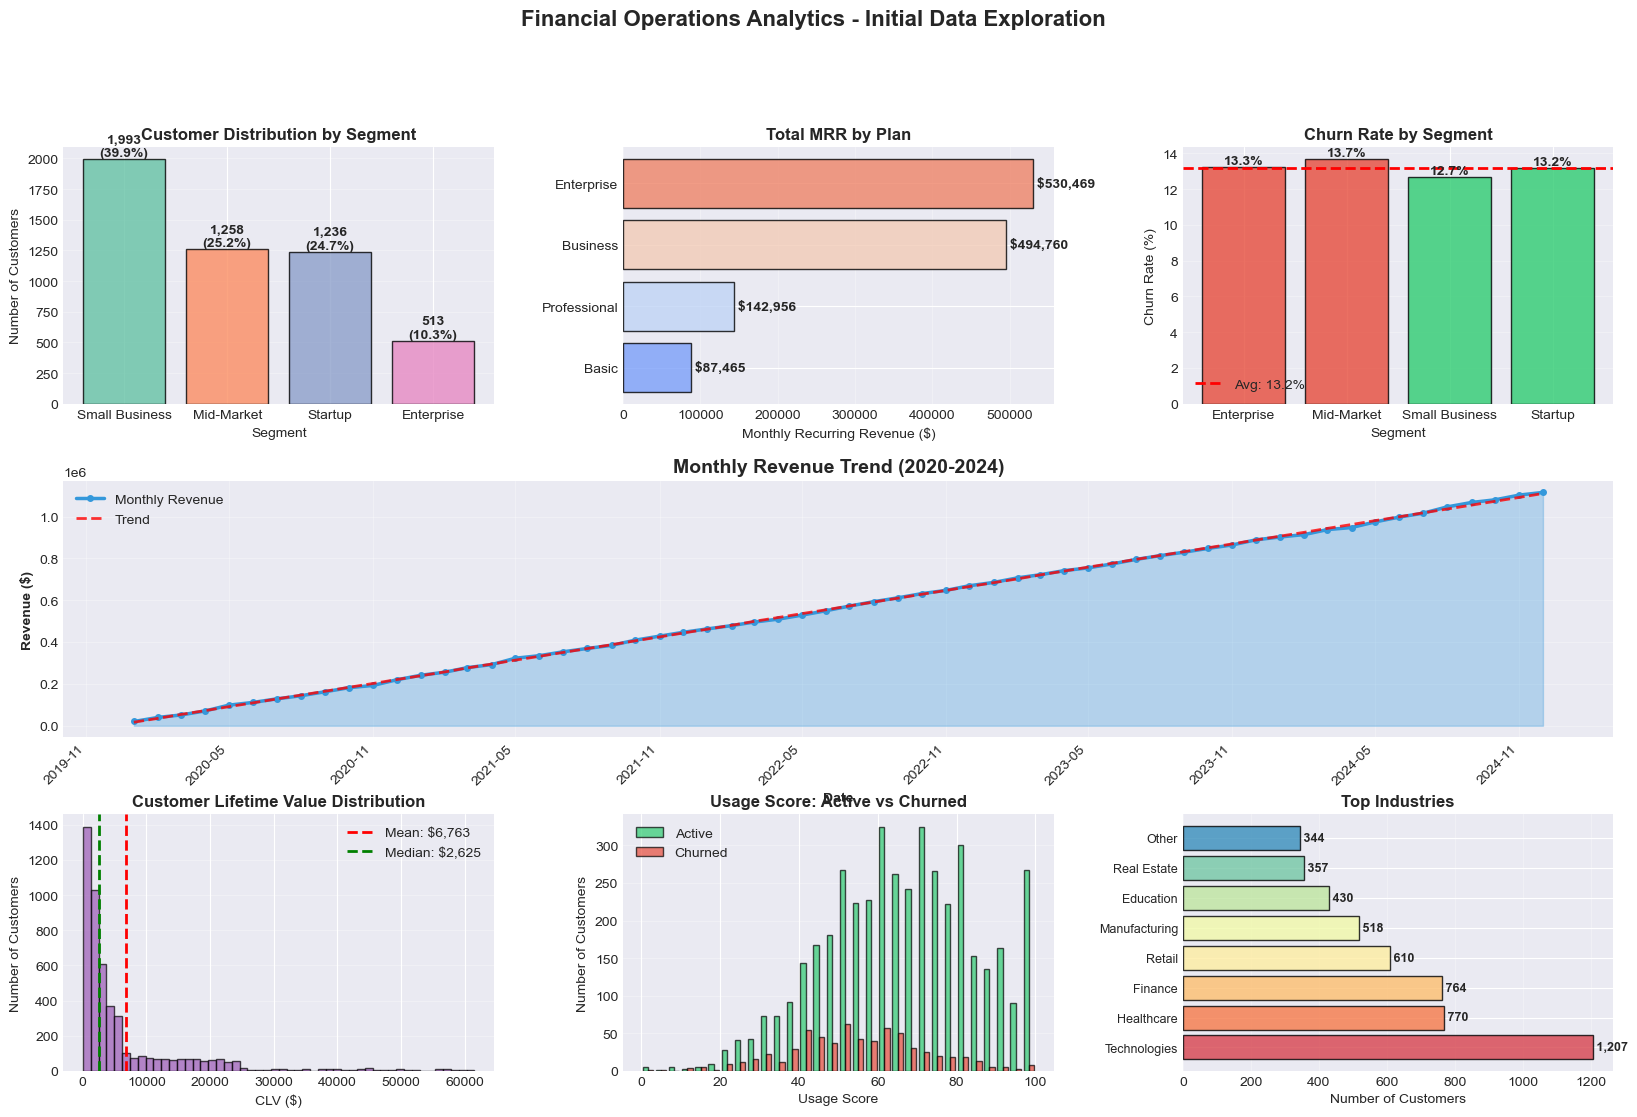


 Data exploration complete!



In [43]:

print("\n\n" + "-"*80)
print("2.4: INITIAL DATA VISUALIZATIONS")
print("-"*80)

# Create comprehensive initial exploration visualizations
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Customer Segment Distribution
ax1 = fig.add_subplot(gs[0, 0])
segment_counts = customers['segment'].value_counts()
colors1 = sns.color_palette("Set2", len(segment_counts))
ax1.bar(segment_counts.index, segment_counts.values, color=colors1, alpha=0.8, edgecolor='black')
ax1.set_title('Customer Distribution by Segment', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Segment')
for i, v in enumerate(segment_counts.values):
    ax1.text(i, v, f'{v:,}\n({v/len(customers)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Monthly Recurring Revenue by Plan
ax2 = fig.add_subplot(gs[0, 1])
plan_revenue = customers.groupby('plan')['mrr'].sum().sort_values(ascending=True)
colors2 = sns.color_palette("coolwarm", len(plan_revenue))
ax2.barh(plan_revenue.index, plan_revenue.values, color=colors2, alpha=0.8, edgecolor='black')
ax2.set_title('Total MRR by Plan', fontweight='bold', fontsize=12)
ax2.set_xlabel('Monthly Recurring Revenue ($)')
for i, v in enumerate(plan_revenue.values):
    ax2.text(v, i, f' ${v:,.0f}', va='center', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Churn Rate by Segment
ax3 = fig.add_subplot(gs[0, 2])
churn_by_segment = customers.groupby('segment')['is_churned'].mean() * 100
colors3 = ['#e74c3c' if x > churn_by_segment.mean() else '#2ecc71' for x in churn_by_segment.values]
ax3.bar(churn_by_segment.index, churn_by_segment.values, color=colors3, alpha=0.8, edgecolor='black')
ax3.set_title('Churn Rate by Segment', fontweight='bold', fontsize=12)
ax3.set_ylabel('Churn Rate (%)')
ax3.set_xlabel('Segment')
ax3.axhline(y=churn_by_segment.mean(), color='red', linestyle='--', 
            label=f'Avg: {churn_by_segment.mean():.1f}%', linewidth=2)
for i, v in enumerate(churn_by_segment.values):
    ax3.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Revenue Trend Over Time
ax4 = fig.add_subplot(gs[1, :])
ax4.plot(monthly_revenue['year_month'], monthly_revenue['total_revenue'], 
         linewidth=2.5, color='#3498db', marker='o', markersize=4, label='Monthly Revenue')
ax4.fill_between(monthly_revenue['year_month'], monthly_revenue['total_revenue'], 
                  alpha=0.3, color='#3498db')
ax4.set_title('Monthly Revenue Trend (2020-2024)', fontweight='bold', fontsize=14)
ax4.set_xlabel('Date', fontweight='bold')
ax4.set_ylabel('Revenue ($)', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# Add trend line
z = np.polyfit(range(len(monthly_revenue)), monthly_revenue['total_revenue'], 1)
p = np.poly1d(z)
ax4.plot(monthly_revenue['year_month'], p(range(len(monthly_revenue))), 
         "r--", alpha=0.8, linewidth=2, label='Trend')
ax4.legend()

# Format x-axis
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 5. Customer Lifetime Value Distribution
ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(customers['clv'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
ax5.axvline(customers['clv'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${customers["clv"].mean():,.0f}')
ax5.axvline(customers['clv'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: ${customers["clv"].median():,.0f}')
ax5.set_title('Customer Lifetime Value Distribution', fontweight='bold', fontsize=12)
ax5.set_xlabel('CLV ($)')
ax5.set_ylabel('Number of Customers')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Usage Score vs Churn
ax6 = fig.add_subplot(gs[2, 1])
churned = customers[customers['is_churned'] == 1]['usage_score']
active = customers[customers['is_churned'] == 0]['usage_score']
ax6.hist([active, churned], bins=30, label=['Active', 'Churned'], 
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax6.set_title('Usage Score: Active vs Churned', fontweight='bold', fontsize=12)
ax6.set_xlabel('Usage Score')
ax6.set_ylabel('Number of Customers')
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

# 7. Industry Distribution
ax7 = fig.add_subplot(gs[2, 2])
industry_counts = customers['industry'].value_counts().head(8)
colors7 = sns.color_palette("Spectral", len(industry_counts))
ax7.barh(range(len(industry_counts)), industry_counts.values, color=colors7, alpha=0.8, edgecolor='black')
ax7.set_yticks(range(len(industry_counts)))
ax7.set_yticklabels(industry_counts.index, fontsize=9)
ax7.set_title('Top Industries', fontweight='bold', fontsize=12)
ax7.set_xlabel('Number of Customers')
for i, v in enumerate(industry_counts.values):
    ax7.text(v, i, f' {v:,}', va='center', fontweight='bold', fontsize=9)
ax7.grid(axis='x', alpha=0.3)

plt.suptitle('Financial Operations Analytics - Initial Data Exploration', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('financial_viz/01_initial_exploration.png', dpi=300, bbox_inches='tight')
print(" Saved: financial_viz/01_initial_exploration.png")
plt.show()

print("\n Data exploration complete!\n")

## Time Series


SECTION 3: REVENUE FORECASTING - TIME SERIES ANALYSIS

Time series forecasting helps us:
1. Predict future revenue with confidence intervals
2. Identify seasonal patterns and trends
3. Support strategic planning and budgeting
4. Set realistic targets and goals

We'll use multiple techniques:
- Statistical decomposition
- ARIMA/SARIMA models
- Facebook Prophet (if available) # Try it when you will follow the steps
- Exponential smoothing


--------------------------------------------------------------------------------
3.1: TIME SERIES DATA PREPARATION
--------------------------------------------------------------------------------

 Time Series Overview:
   • Start Date: 2020-01-01 00:00:00
   • End Date: 2024-12-01 00:00:00
   • Number of Periods: 60
   • Frequency: Monthly
   No missing periods

--------------------------------------------------------------------------------
3.2: TIME SERIES DECOMPOSITION
------------------------------------------------------------------------------

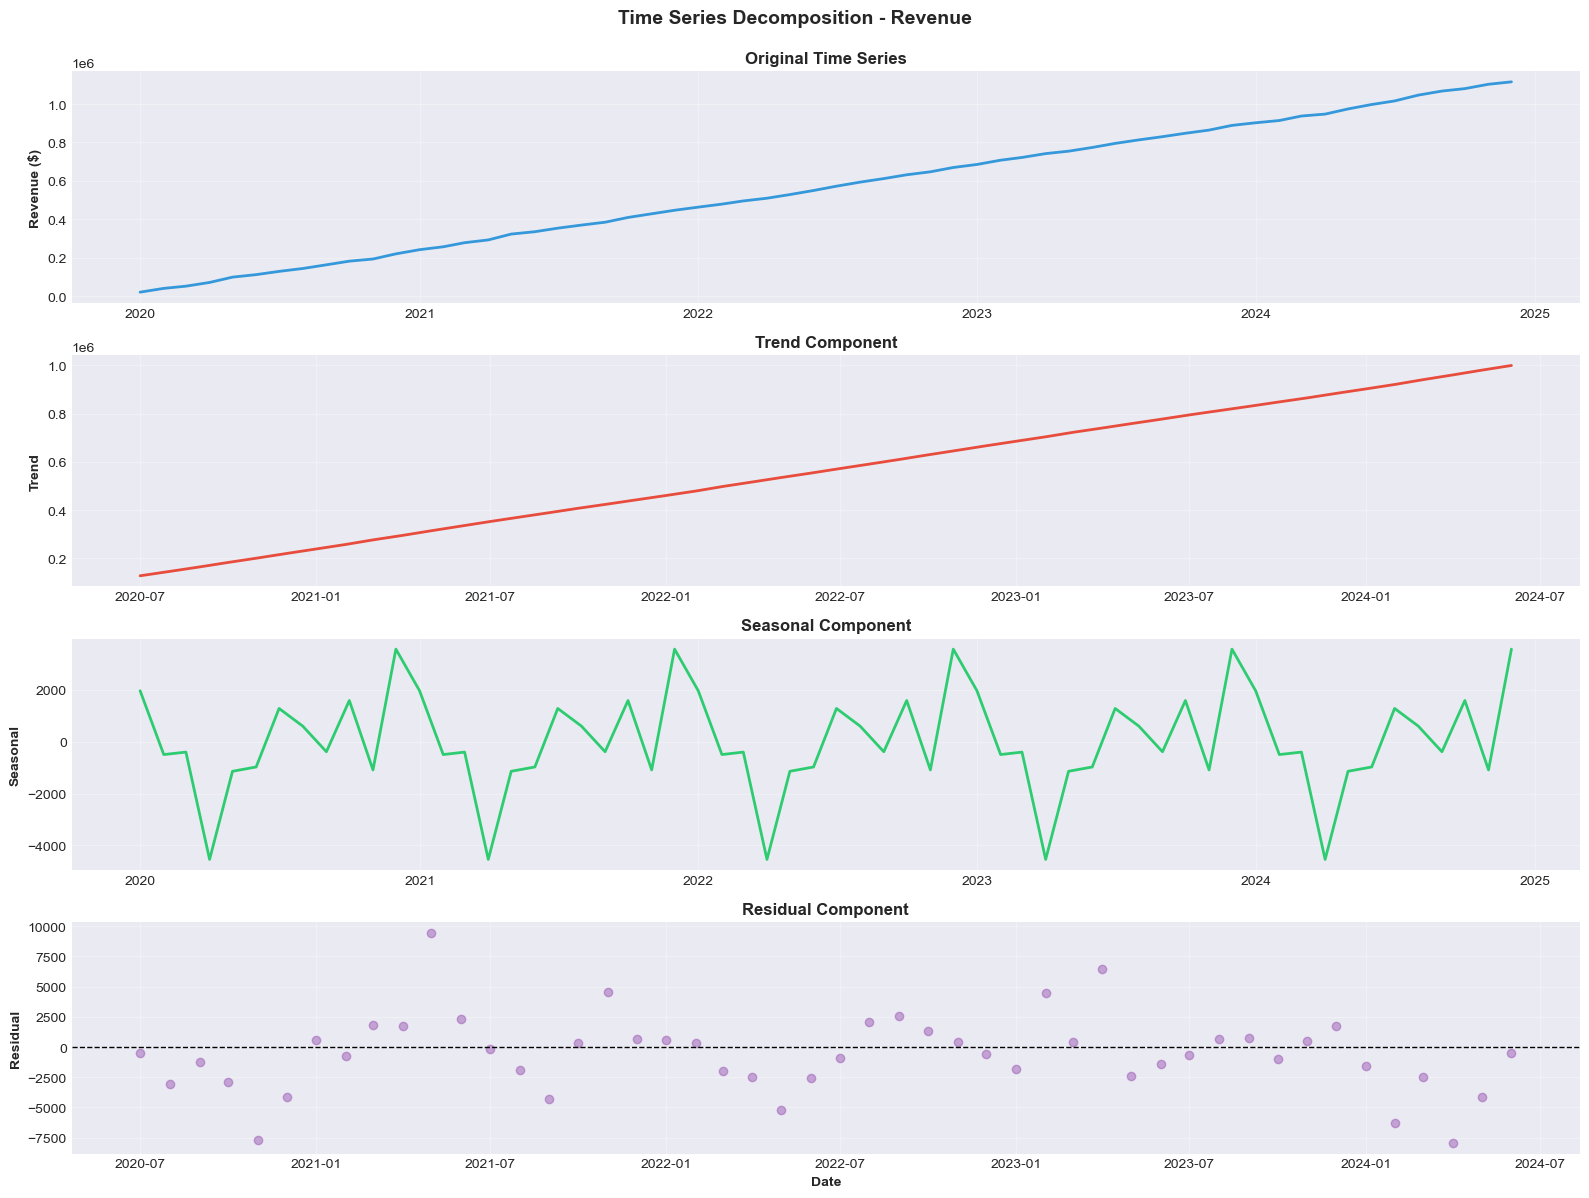


📊 Decomposition Analysis:
   • Seasonal Strength: 0.272 (0=none, 1=perfect)
   • Trend Strength: 1.000
   Weak seasonality - ARIMA may suffice

--------------------------------------------------------------------------------
3.3: STATIONARITY TESTING (Augmented Dickey-Fuller Test)
--------------------------------------------------------------------------------

Stationarity is crucial for ARIMA modeling.
A stationary series has:
  • Constant mean over time
  • Constant variance over time
  • No seasonality

ADF Test:
  • H0 (null): Series has a unit root (non-stationary)
  • H1 (alternative): Series is stationary
  • If p-value < 0.05, we reject H0 (series is stationary)


ADF Test Results:
   • ADF Statistic: 1.0964
   • P-value: 0.9952
   • Critical Values:
      - 1%: -3.5553
      - 5%: -2.9157
      - 10%: -2.5957

   Series is non-stationary (p >= 0.05)
   → Differencing required for ARIMA modeling

   After first differencing:
   • ADF Statistic: -4.7564
   • P-value: 0.0001
  

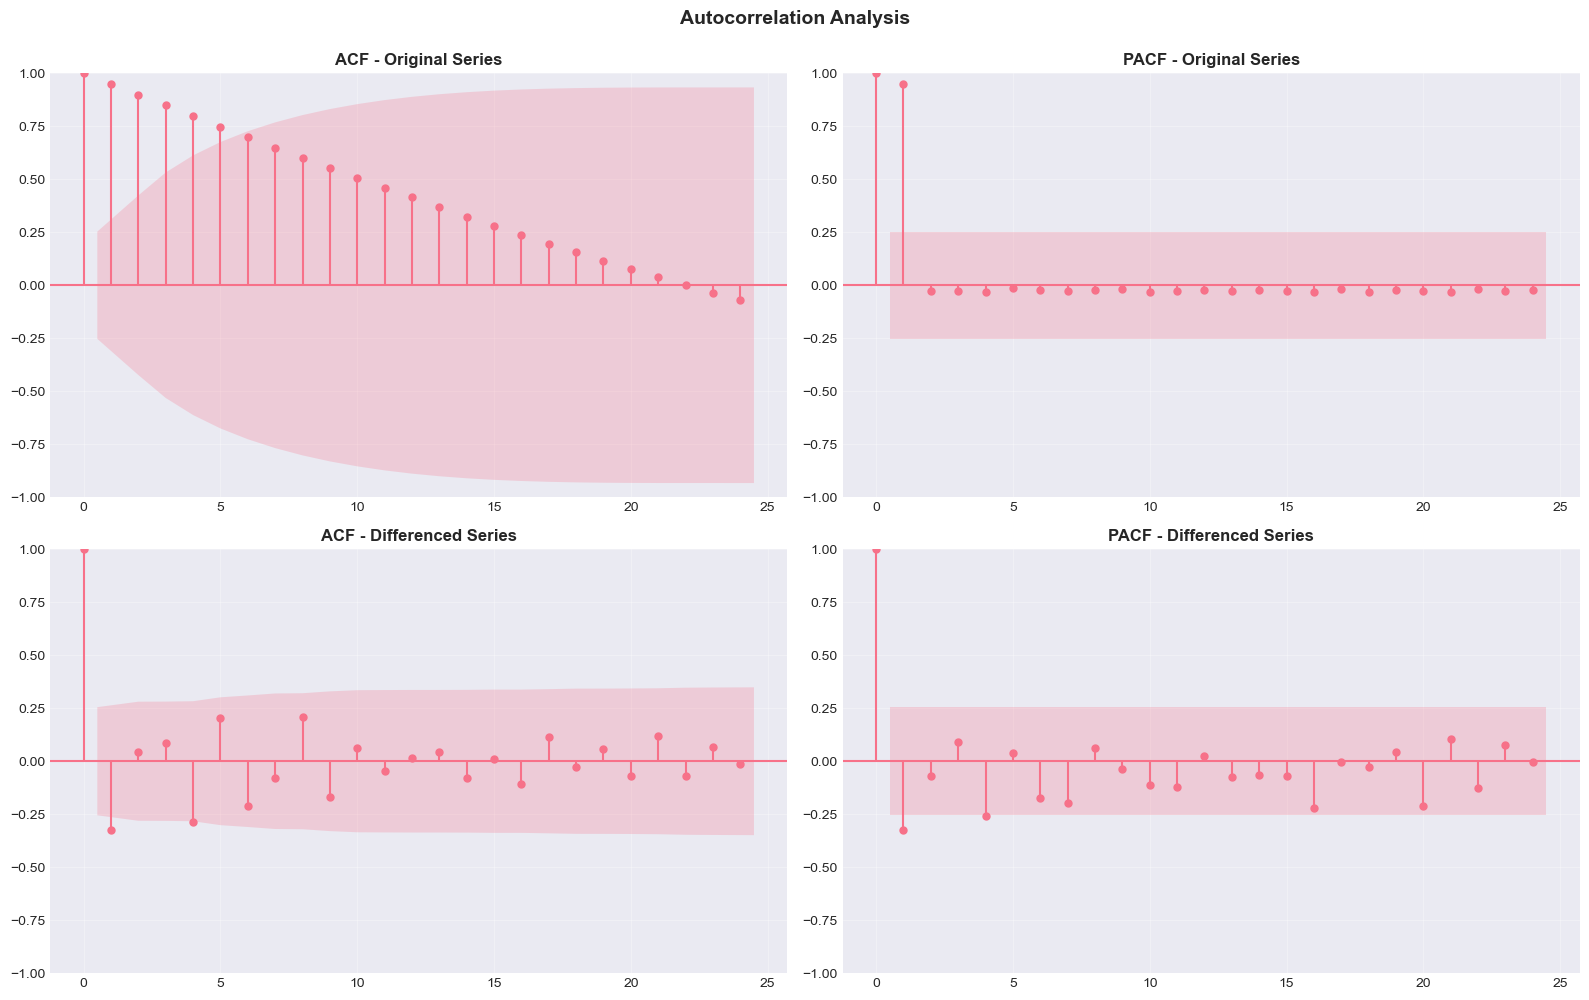


--------------------------------------------------------------------------------
3.5: ARIMA MODEL TRAINING
--------------------------------------------------------------------------------

ARIMA Model Parameters:
  • p: AR (autoregressive) order - based on PACF
  • d: Differencing order - based on stationarity test
  • q: MA (moving average) order - based on ACF

We'll test multiple parameter combinations and select the best model.


Data Split:
   • Training Set: 48 periods (2020-01-01 00:00:00 to 2023-12-01 00:00:00)
   • Test Set: 12 periods (2024-01-01 00:00:00 to 2024-12-01 00:00:00)

 Searching for optimal ARIMA parameters...
Testing combinations of p=[0,1,2], d=[0,1], q=[0,1,2]

   ARIMA(0,0,0) - AIC: 1474.59
   ARIMA(0,0,1) - AIC: 1300.49
   ARIMA(0,0,2) - AIC: 1289.69
   ARIMA(0,1,0) - AIC: 1061.17
   ARIMA(0,1,1) - AIC: 1026.96
   ARIMA(0,1,2) - AIC: 1030.46
   ARIMA(1,0,0) - AIC: 1093.92
   ARIMA(1,0,1) - AIC: 1061.07
   ARIMA(1,0,2) - AIC: 1063.02
   ARIMA(1,1,0) - AIC: 96

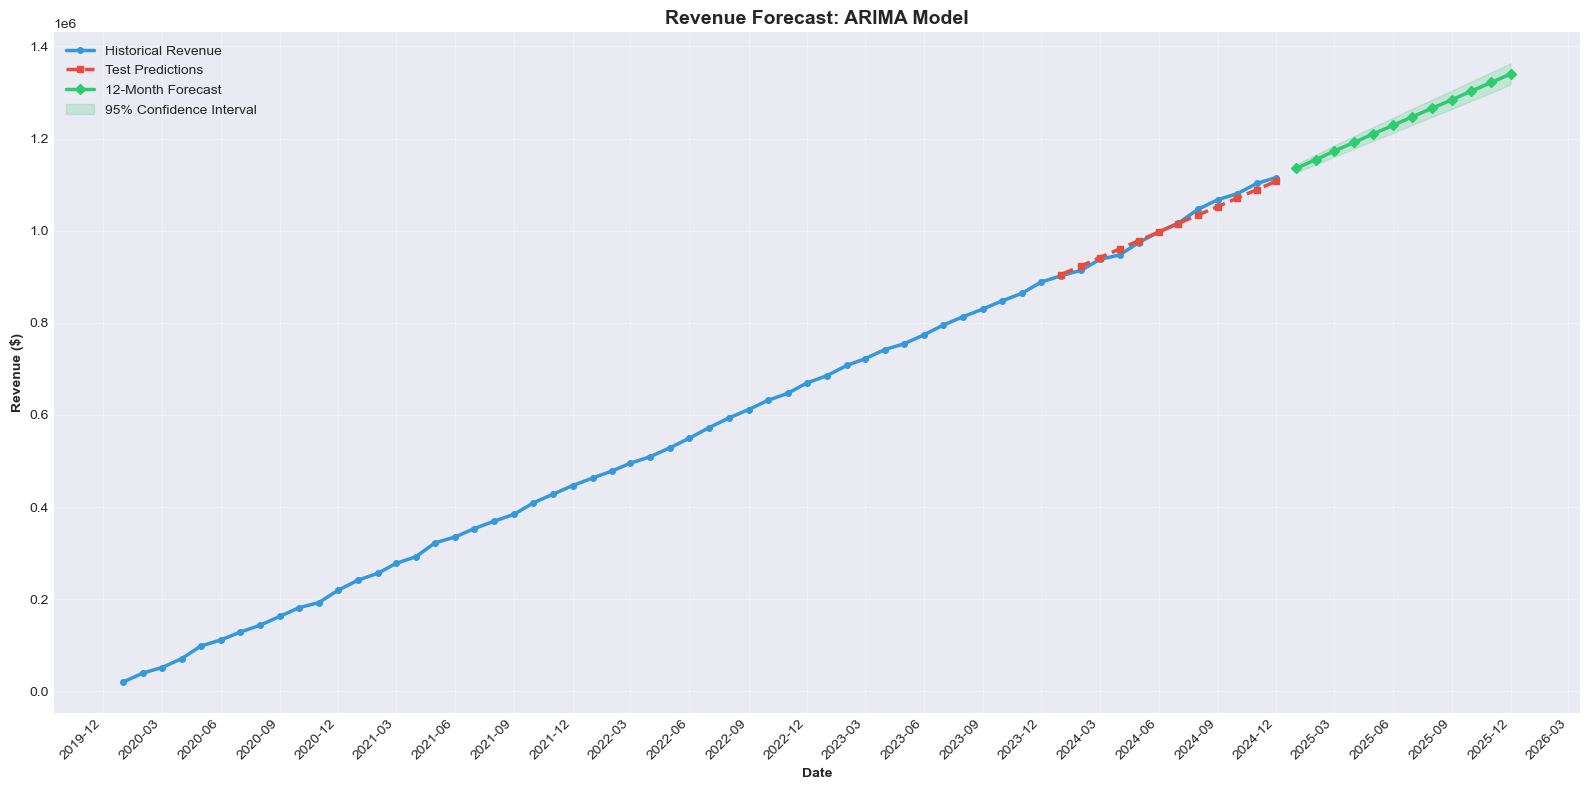


--------------------------------------------------------------------------------
3.7: FACEBOOK PROPHET FORECASTING
--------------------------------------------------------------------------------

Prophet is particularly good at:
  • Handling missing data and outliers
  • Detecting multiple seasonalities
  • Including holidays and special events
  • Providing interpretable components
    

 Training Prophet model...


20:01:21 - cmdstanpy - INFO - Chain [1] start processing
20:01:22 - cmdstanpy - INFO - Chain [1] done processing


 Prophet model trained successfully!

 Prophet 12-Month Forecast:

  Month  Forecasted_Revenue  Lower_95%  Upper_95%
2025-01          1141962.60 1138174.07 1145587.79
2025-02          1158770.27 1155024.43 1162191.98
2025-03          1174306.21 1170517.74 1178101.47
2025-04          1190875.88 1186850.57 1195064.27
2025-05          1216743.93 1212382.42 1220939.98
2025-06          1235769.12 1230631.87 1240767.18
2025-07          1256401.27 1251002.45 1262401.15
2025-08          1278274.64 1271825.42 1285195.13
2025-09          1298027.68 1290576.73 1305793.86
2025-10          1318146.26 1309749.02 1327050.25
2025-11          1336016.82 1325994.52 1345626.36
2025-12          1357438.32 1346728.26 1368190.52

 Saved: financial_viz/05_prophet_forecast.png


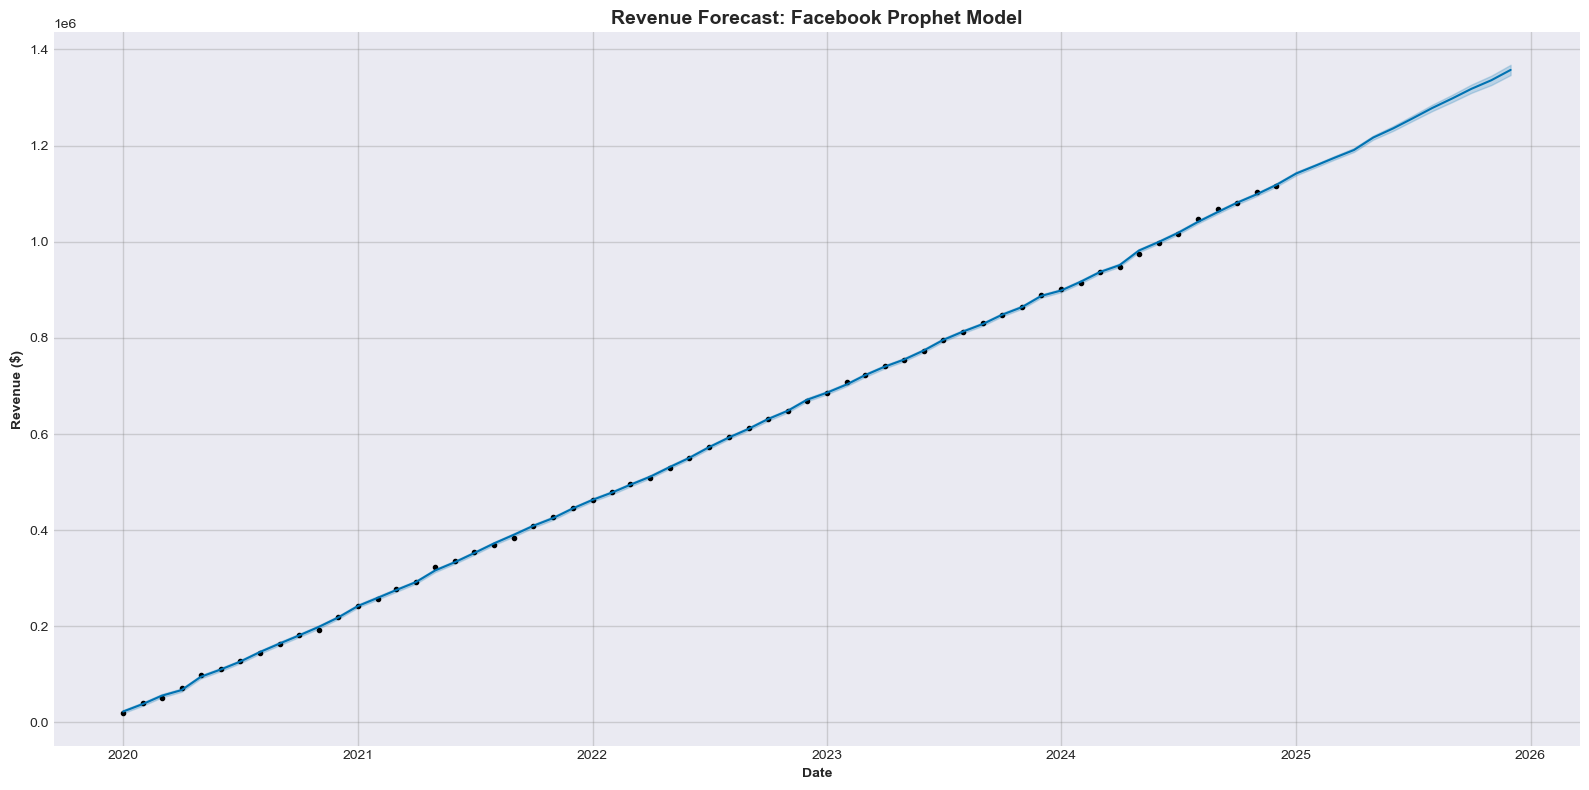

 Saved: financial_viz/06_prophet_components.png


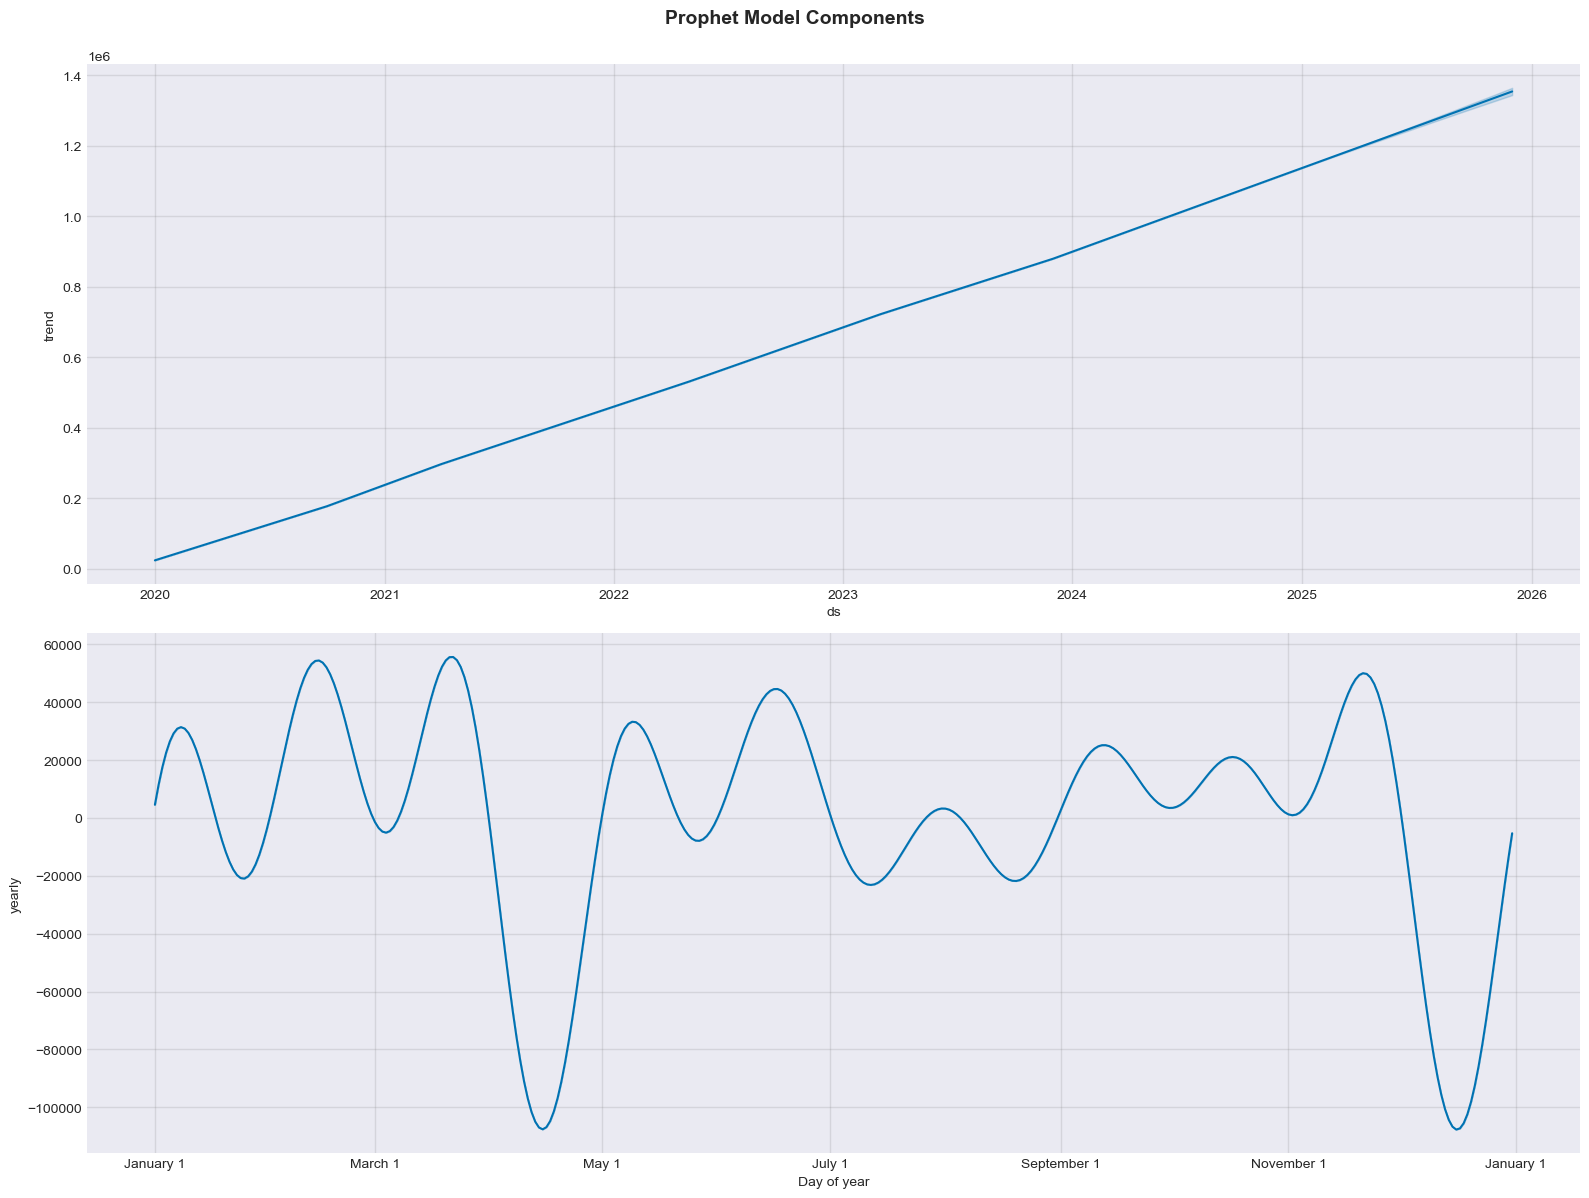


 Revenue Forecasting Complete!



In [44]:
print("\n" + "="*80)
print("SECTION 3: REVENUE FORECASTING - TIME SERIES ANALYSIS")
print("="*80)

print("""
Time series forecasting helps us:
1. Predict future revenue with confidence intervals
2. Identify seasonal patterns and trends
3. Support strategic planning and budgeting
4. Set realistic targets and goals

We'll use multiple techniques:
- Statistical decomposition
- ARIMA/SARIMA models
- Facebook Prophet (if available) # Try it when you will follow the steps
- Exponential smoothing
""")

# ========================================================================
# 3.1: TIME SERIES PREPARATION
# ========================================================================

print("\n" + "-"*80)
print("3.1: TIME SERIES DATA PREPARATION")
print("-"*80)

# Prepare time series data
ts_data = monthly_revenue[['year_month', 'total_revenue']].copy()
ts_data.set_index('year_month', inplace=True)
ts_data.index.freq = 'MS'  # Month Start frequency

print(f"\n Time Series Overview:")
print(f"   • Start Date: {ts_data.index.min()}")
print(f"   • End Date: {ts_data.index.max()}")
print(f"   • Number of Periods: {len(ts_data)}")
print(f"   • Frequency: Monthly")

# Check for missing periods
expected_periods = pd.date_range(start=ts_data.index.min(), 
                                  end=ts_data.index.max(), 
                                  freq='MS')
missing_periods = expected_periods.difference(ts_data.index)
if len(missing_periods) > 0:
    print(f"   Missing periods detected: {len(missing_periods)}")
else:
    print(f"   No missing periods")

# ========================================================================
# 3.2: TIME SERIES DECOMPOSITION
# ========================================================================

print("\n" + "-"*80)
print("3.2: TIME SERIES DECOMPOSITION")
print("-"*80)

print("\nDecomposing time series into:")
print("   • Trend: Long-term progression")
print("   • Seasonality: Repeating patterns")
print("   • Residual: Random fluctuations\n")

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_data['total_revenue'], 
                                   model='additive', 
                                   period=12)

# Create decomposition plot
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Original
axes[0].plot(ts_data.index, ts_data['total_revenue'], linewidth=2, color='#3498db')
axes[0].set_ylabel('Revenue ($)', fontweight='bold')
axes[0].set_title('Original Time Series', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(decomposition.trend.index, decomposition.trend, linewidth=2, color='#e74c3c')
axes[1].set_ylabel('Trend', fontweight='bold')
axes[1].set_title('Trend Component', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)


# Seasonality
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, linewidth=2, color='#2ecc71')
axes[2].set_ylabel('Seasonal', fontweight='bold')
axes[2].set_title('Seasonal Component', fontweight='bold', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].scatter(decomposition.resid.index, decomposition.resid, alpha=0.5, color='#9b59b6')
axes[3].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[3].set_ylabel('Residual', fontweight='bold')
axes[3].set_xlabel('Date', fontweight='bold')
axes[3].set_title('Residual Component', fontweight='bold', fontsize=12)
axes[3].grid(True, alpha=0.3)

plt.suptitle('Time Series Decomposition - Revenue', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/02_ts_decomposition.png', dpi=300, bbox_inches='tight')
print(" Saved: financial_viz/02_ts_decomposition.png")
plt.show()

# Calculate seasonality strength
seasonal_strength = 1 - (decomposition.resid.var() / (decomposition.seasonal + decomposition.resid).var())
trend_strength = 1 - (decomposition.resid.var() / (decomposition.trend + decomposition.resid).var())

print(f"\n📊 Decomposition Analysis:")
print(f"   • Seasonal Strength: {seasonal_strength:.3f} (0=none, 1=perfect)")
print(f"   • Trend Strength: {trend_strength:.3f}")
if seasonal_strength > 0.6:
    print(f"   Strong seasonality detected - use SARIMA")
else:
    print(f"   Weak seasonality - ARIMA may suffice")


# ========================================================================
# 3.3: STATIONARITY TEST
# ========================================================================

print("\n" + "-"*80)
print("3.3: STATIONARITY TESTING (Augmented Dickey-Fuller Test)")
print("-"*80)

print("""
Stationarity is crucial for ARIMA modeling.
A stationary series has:
  • Constant mean over time
  • Constant variance over time
  • No seasonality

ADF Test:
  • H0 (null): Series has a unit root (non-stationary)
  • H1 (alternative): Series is stationary
  • If p-value < 0.05, we reject H0 (series is stationary)
""")

# Perform ADF test
adf_result = adfuller(ts_data['total_revenue'].dropna())

print(f"\nADF Test Results:")
print(f"   • ADF Statistic: {adf_result[0]:.4f}")
print(f"   • P-value: {adf_result[1]:.4f}")
print(f"   • Critical Values:")
for key, value in adf_result[4].items():
    print(f"      - {key}: {value:.4f}")

if adf_result[1] < 0.05:
    print(f"\n   Series is stationary (p < 0.05)")
    differencing_needed = False
else:
    print(f"\n   Series is non-stationary (p >= 0.05)")
    print(f"   → Differencing required for ARIMA modeling")
    differencing_needed = True

# If non-stationary, apply differencing
if differencing_needed:
    ts_data['revenue_diff'] = ts_data['total_revenue'].diff()
    
    # Test differenced series
    adf_diff = adfuller(ts_data['revenue_diff'].dropna())
    print(f"\n   After first differencing:")
    print(f"   • ADF Statistic: {adf_diff[0]:.4f}")
    print(f"   • P-value: {adf_diff[1]:.4f}")
    
    if adf_diff[1] < 0.05:
        print(f"   Differenced series is stationary")

# ========================================================================
# 3.4: ACF AND PACF ANALYSIS
# ========================================================================

print("\n" + "-"*80)
print("3.4: ACF & PACF ANALYSIS (For ARIMA Parameter Selection)")
print("-"*80)

print("""
ACF (Autocorrelation Function):
  • Shows correlation between time series and its lagged values
  • Helps determine MA (Moving Average) order (q)

PACF (Partial Autocorrelation Function):
  • Shows correlation between observations at different lags
  • Helps determine AR (Autoregressive) order (p)
""")

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF - Original
plot_acf(ts_data['total_revenue'].dropna(), lags=24, ax=axes[0, 0])
axes[0, 0].set_title('ACF - Original Series', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# PACF - Original
plot_pacf(ts_data['total_revenue'].dropna(), lags=24, ax=axes[0, 1])
axes[0, 1].set_title('PACF - Original Series', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# ACF - Differenced (if needed)
if differencing_needed:
    plot_acf(ts_data['revenue_diff'].dropna(), lags=24, ax=axes[1, 0])
    axes[1, 0].set_title('ACF - Differenced Series', fontweight='bold', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)
    
    plot_pacf(ts_data['revenue_diff'].dropna(), lags=24, ax=axes[1, 1])
    axes[1, 1].set_title('PACF - Differenced Series', fontweight='bold', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # If stationary, show seasonal patterns
    axes[1, 0].plot(range(1, 13), [ts_data[ts_data.index.month == m]['total_revenue'].mean() 
                                    for m in range(1, 13)], 
                   marker='o', linewidth=2, markersize=8, color='#e74c3c')
    axes[1, 0].set_title('Average Revenue by Month', fontweight='bold', fontsize=12)
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Average Revenue ($)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xticks(range(1, 13))
    
    axes[1, 1].boxplot([ts_data[ts_data.index.month == m]['total_revenue'] 
                        for m in range(1, 13)])
    axes[1, 1].set_title('Revenue Distribution by Month', fontweight='bold', fontsize=12)
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Revenue ($)')
    axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Autocorrelation Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/03_acf_pacf_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/03_acf_pacf_analysis.png")
plt.show()


# ========================================================================
# 3.5: ARIMA MODEL TRAINING
# ========================================================================

print("\n" + "-"*80)
print("3.5: ARIMA MODEL TRAINING")
print("-"*80)

print("""
ARIMA Model Parameters:
  • p: AR (autoregressive) order - based on PACF
  • d: Differencing order - based on stationarity test
  • q: MA (moving average) order - based on ACF

We'll test multiple parameter combinations and select the best model.
""")

# Split data: train on first 80%, test on last 20%
train_size = int(len(ts_data) * 0.8)
train_data = ts_data['total_revenue'][:train_size]
test_data = ts_data['total_revenue'][train_size:]

print(f"\nData Split:")
print(f"   • Training Set: {len(train_data)} periods ({train_data.index.min()} to {train_data.index.max()})")
print(f"   • Test Set: {len(test_data)} periods ({test_data.index.min()} to {test_data.index.max()})")


# Grid search for best ARIMA parameters
print("\n Searching for optimal ARIMA parameters...")
print("Testing combinations of p=[0,1,2], d=[0,1], q=[0,1,2]\n")

best_aic = np.inf
best_params = None
best_model = None

results_list = []

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                fitted_model = model.fit()
                aic = fitted_model.aic
                results_list.append({'p': p, 'd': d, 'q': q, 'AIC': aic})
                
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
                    best_model = fitted_model
                    
                print(f"   ARIMA({p},{d},{q}) - AIC: {aic:.2f}")
            except Exception as e:
                print(f"   ARIMA({p},{d},{q}) - Failed: {str(e)[:50]}")
                continue

print(f"\n Best Model: ARIMA{best_params} with AIC = {best_aic:.2f}")

# Display model summary
print("\n" + "-"*80)
print("MODEL SUMMARY")
print("-"*80)
print(best_model.summary())

# Make predictions on test set
predictions = best_model.forecast(steps=len(test_data))

# Calculate error metrics
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

print("\n" + "-"*80)
print("MODEL PERFORMANCE ON TEST SET")
print("-"*80)
print(f"   • MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"   • RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"   • MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# ========================================================================
# 3.6: FUTURE FORECASTING
# ========================================================================

print("\n" + "-"*80)
print("3.6: REVENUE FORECASTING - NEXT 12 MONTHS")
print("-"*80)

# Refit model on full dataset
final_model = ARIMA(ts_data['total_revenue'], order=best_params)
final_fitted = final_model.fit()

# Forecast next 12 months
forecast_periods = 12
forecast = final_fitted.forecast(steps=forecast_periods)
forecast_index = pd.date_range(start=ts_data.index.max() + pd.DateOffset(months=1), 
                                periods=forecast_periods, 
                                freq='MS')

# Get confidence intervals
forecast_df = final_fitted.get_forecast(steps=forecast_periods)
forecast_ci = forecast_df.conf_int()

print(f"\n 12-Month Revenue Forecast:\n")
forecast_summary = pd.DataFrame({
    'Month': forecast_index.strftime('%Y-%m'),
    'Forecasted_Revenue': forecast.values,
    'Lower_95%': forecast_ci.iloc[:, 0].values,
    'Upper_95%': forecast_ci.iloc[:, 1].values
})
print(forecast_summary.to_string(index=False))

print(f"\n Summary Statistics:")
print(f"   • Total Forecasted Revenue (12 months): ${forecast.sum():,.2f}")
print(f"   • Average Monthly Revenue: ${forecast.mean():,.2f}")
print(f"   • Expected Growth from Last Month: ${(forecast.iloc[0] - ts_data['total_revenue'].iloc[-1]):,.2f}")


# Visualize forecast
fig, ax = plt.subplots(figsize=(16, 8))

# Historical data
ax.plot(ts_data.index, ts_data['total_revenue'], 
        linewidth=2.5, color='#3498db', label='Historical Revenue', marker='o', markersize=4)

# Test set predictions (if we want to show validation)
ax.plot(test_data.index, predictions, 
        linewidth=2.5, color='#e74c3c', label='Test Predictions', 
        marker='s', markersize=4, linestyle='--')

# Future forecast
ax.plot(forecast_index, forecast, 
        linewidth=2.5, color='#2ecc71', label='12-Month Forecast', 
        marker='D', markersize=5)

# Confidence interval
ax.fill_between(forecast_index, 
                forecast_ci.iloc[:, 0], 
                forecast_ci.iloc[:, 1], 
                color='#2ecc71', alpha=0.2, label='95% Confidence Interval')

ax.set_title('Revenue Forecast: ARIMA Model', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Revenue ($)', fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('financial_viz/04_arima_forecast.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/04_arima_forecast.png")
plt.show()


# ========================================================================
# 3.7: PROPHET MODEL (if available)
# ========================================================================

if PROPHET_AVAILABLE:
    print("\n" + "-"*80)
    print("3.7: FACEBOOK PROPHET FORECASTING")
    print("-"*80)
    
    print("""
Prophet is particularly good at:
  • Handling missing data and outliers
  • Detecting multiple seasonalities
  • Including holidays and special events
  • Providing interpretable components
    """)
    
    # Prepare data for Prophet (requires 'ds' and 'y' columns)
    prophet_df = pd.DataFrame({
        'ds': ts_data.index,
        'y': ts_data['total_revenue'].values
    })
    
    # Train Prophet model
    print("\n Training Prophet model...")
    prophet_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode='additive',
        changepoint_prior_scale=0.05
    )
    
    prophet_model.fit(prophet_df)
    print(" Prophet model trained successfully!")
    
    
    # Make future dataframe
    future = prophet_model.make_future_dataframe(periods=12, freq='MS')
    
    # Predict
    prophet_forecast = prophet_model.predict(future)
    
    # Extract last 12 months forecast
    prophet_future = prophet_forecast.tail(12)
    
    print(f"\n Prophet 12-Month Forecast:\n")
    prophet_summary = pd.DataFrame({
        'Month': prophet_future['ds'].dt.strftime('%Y-%m'),
        'Forecasted_Revenue': prophet_future['yhat'].values,
        'Lower_95%': prophet_future['yhat_lower'].values,
        'Upper_95%': prophet_future['yhat_upper'].values
    })
    print(prophet_summary.to_string(index=False))

    # Plot Prophet forecast
    fig = prophet_model.plot(prophet_forecast, figsize=(16, 8))
    ax = fig.gca()
    ax.set_title('Revenue Forecast: Facebook Prophet Model', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontweight='bold')
    ax.set_ylabel('Revenue ($)', fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('financial_viz/05_prophet_forecast.png', dpi=300, bbox_inches='tight')
    print("\n Saved: financial_viz/05_prophet_forecast.png")
    plt.show()
    
    # Plot components
    fig = prophet_model.plot_components(prophet_forecast, figsize=(16, 12))
    plt.suptitle('Prophet Model Components', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('financial_viz/06_prophet_components.png', dpi=300, bbox_inches='tight')
    print(" Saved: financial_viz/06_prophet_components.png")
    plt.show()
    
else:
    print("\n Facebook Prophet not available. Skipping Prophet forecasting.")
    print("Install with: pip install prophet")

print("\n Revenue Forecasting Complete!")
print("="*80 + "\n")
    

## Customer Churn Analysis


SECTION 4: CUSTOMER CHURN ANALYSIS & PREDICTION

Churn analysis helps us:
1. Identify customers at risk of leaving
2. Understand key churn drivers
3. Calculate financial impact of churn
4. Develop retention strategies

We'll analyze:
  • Churn rates by segment and cohort
  • Predictive models for churn risk
  • Customer lifetime value impact
  • Intervention opportunities


--------------------------------------------------------------------------------
4.1: CHURN OVERVIEW & STATISTICS
--------------------------------------------------------------------------------

 Overall Churn Metrics:
   • Total Customers: 5,000
   • Active Customers: 4,344.0 (86.9%)
   • Churned Customers: 656.0 (13.1%)

 Churn Rate by Customer Segment:
                Churned_Count  Churn_Rate  Total_Customers
segment                                                   
Mid-Market             172.00       13.67             1258
Enterprise              68.00       13.26              513
Startup                163.

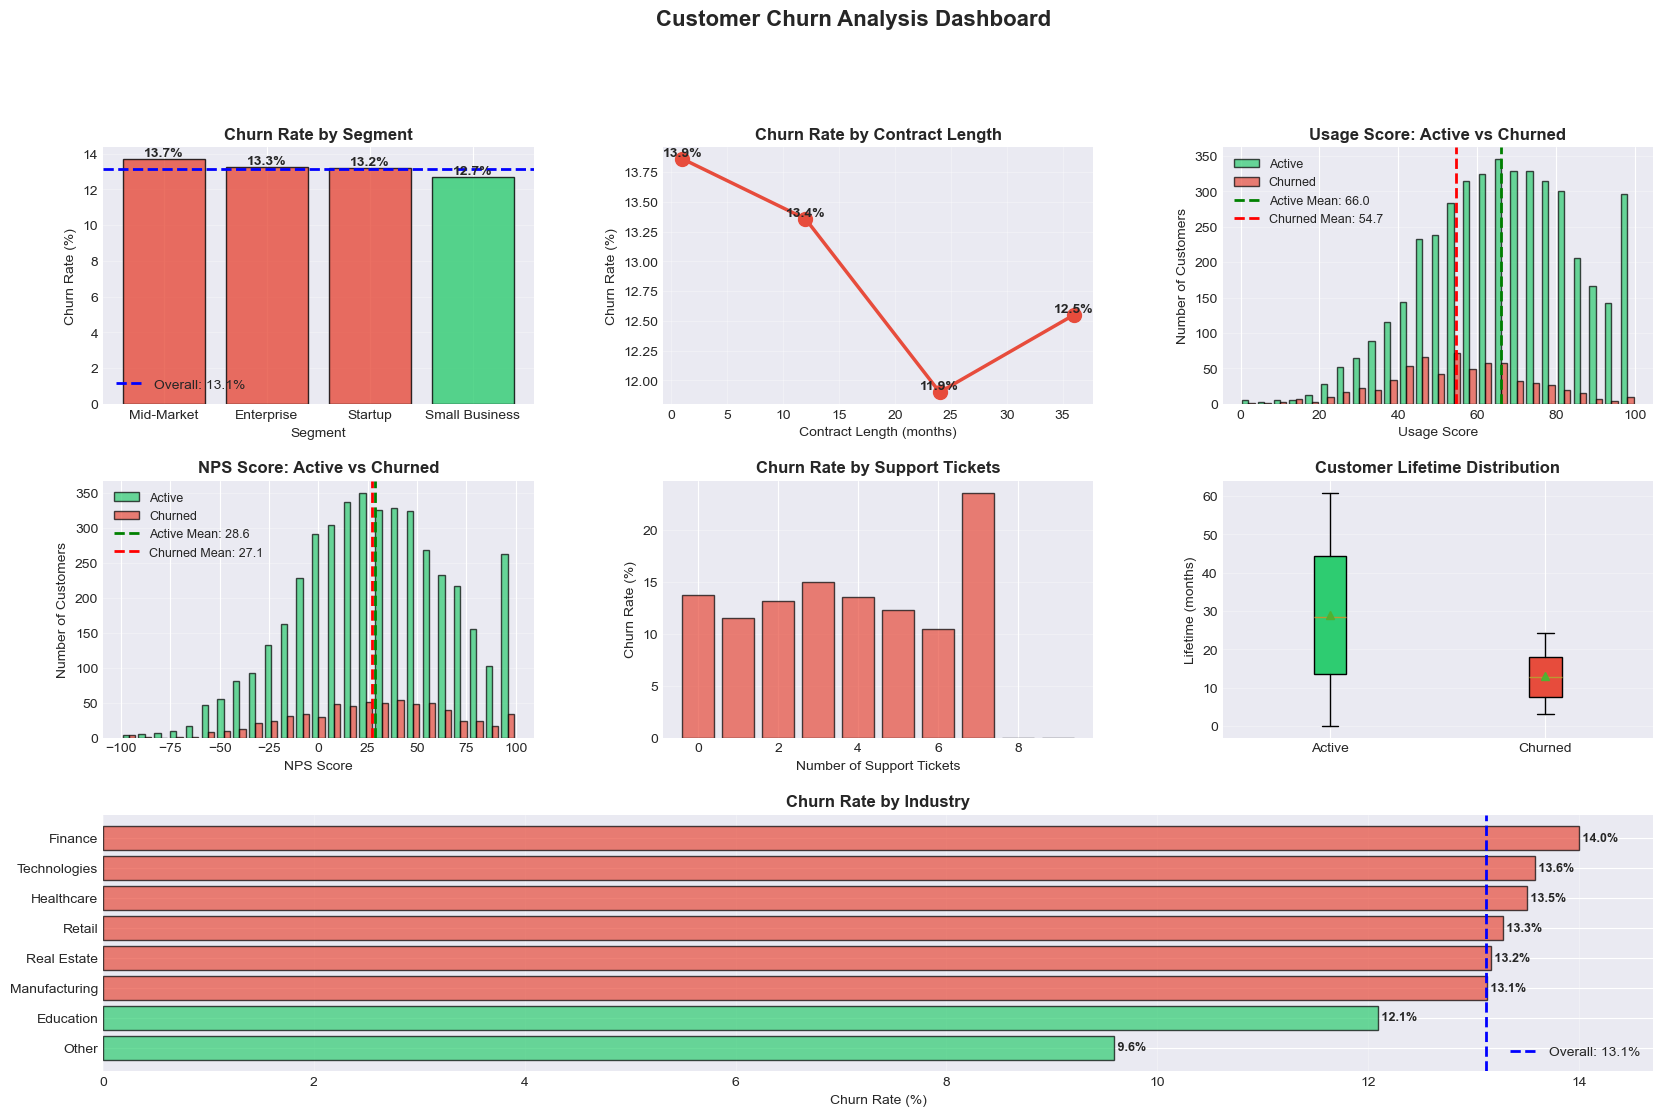


--------------------------------------------------------------------------------
4.3: FEATURE ENGINEERING FOR CHURN PREDICTION
--------------------------------------------------------------------------------

Creating predictive features...
 Created engagement and risk features

 Feature Set:
   • Numeric Features: 15
   • Categorical Features: 4
   • Total Features: 19

 Dataset for Modeling:
   • Total Samples: 5,000
   • Features: 19
   • Churned (Class 1): 656.0 (13.1%)
   • Active (Class 0): 4,344.0 (86.9%)

--------------------------------------------------------------------------------
4.4: CHURN PREDICTION MODEL TRAINING
--------------------------------------------------------------------------------

Data Split:
   • Training Set: 4,000 samples
   • Test Set: 1,000 samples

 Training Multiple Models...

 Logistic Regression...
   Accuracy: 0.9980
   ROC AUC: 0.9945

 Random Forest Classifier...
   Accuracy: 1.0000
   ROC AUC: 1.0000

 Gradient Boosting Classifier...
   Accura

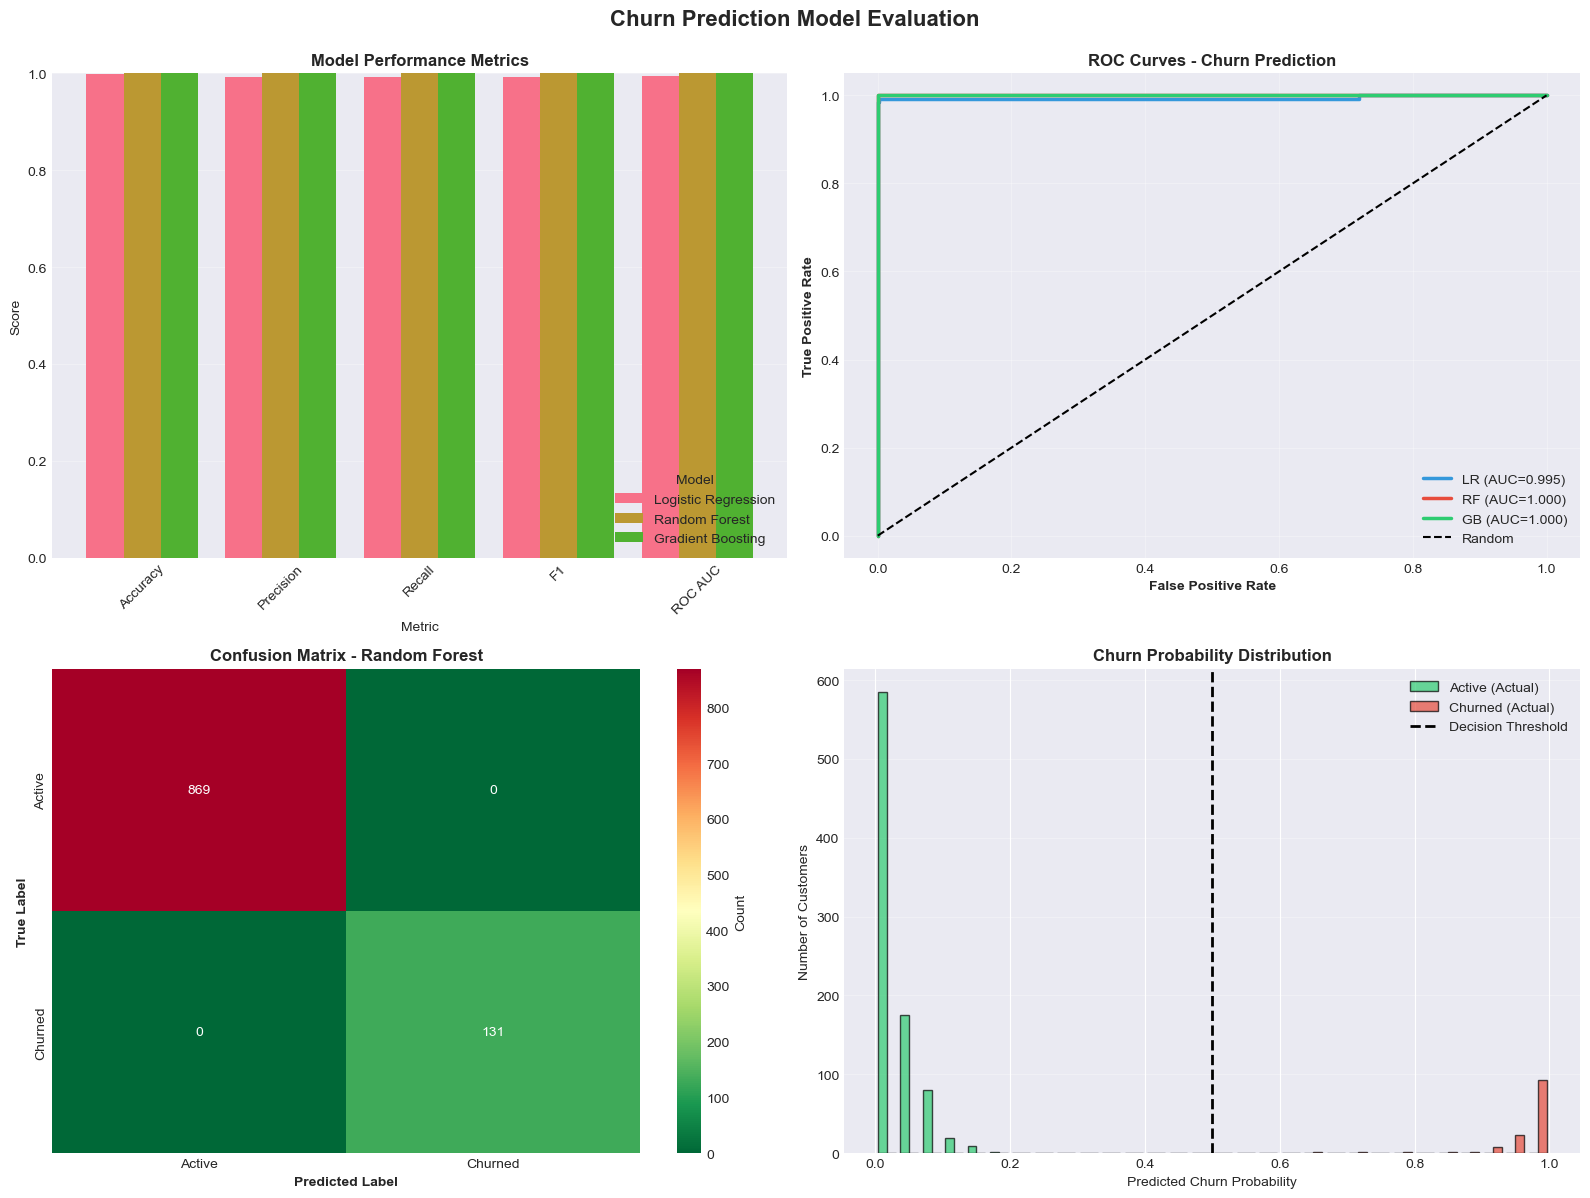


--------------------------------------------------------------------------------
4.6: FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

 Top 15 Most Important Features for Churn Prediction:

              feature  importance
         recency_days        0.52
      lifetime_months        0.16
    transaction_count        0.13
    customer_age_days        0.12
    tickets_per_month        0.03
          usage_score        0.02
avg_transaction_value        0.00
      support_tickets        0.00
      number_of_users        0.00
            nps_score        0.00
            low_usage        0.00
     industry_encoded        0.00
      country_encoded        0.00
         plan_encoded        0.00
      contract_length        0.00

 Saved: financial_viz/09_churn_feature_importance.png


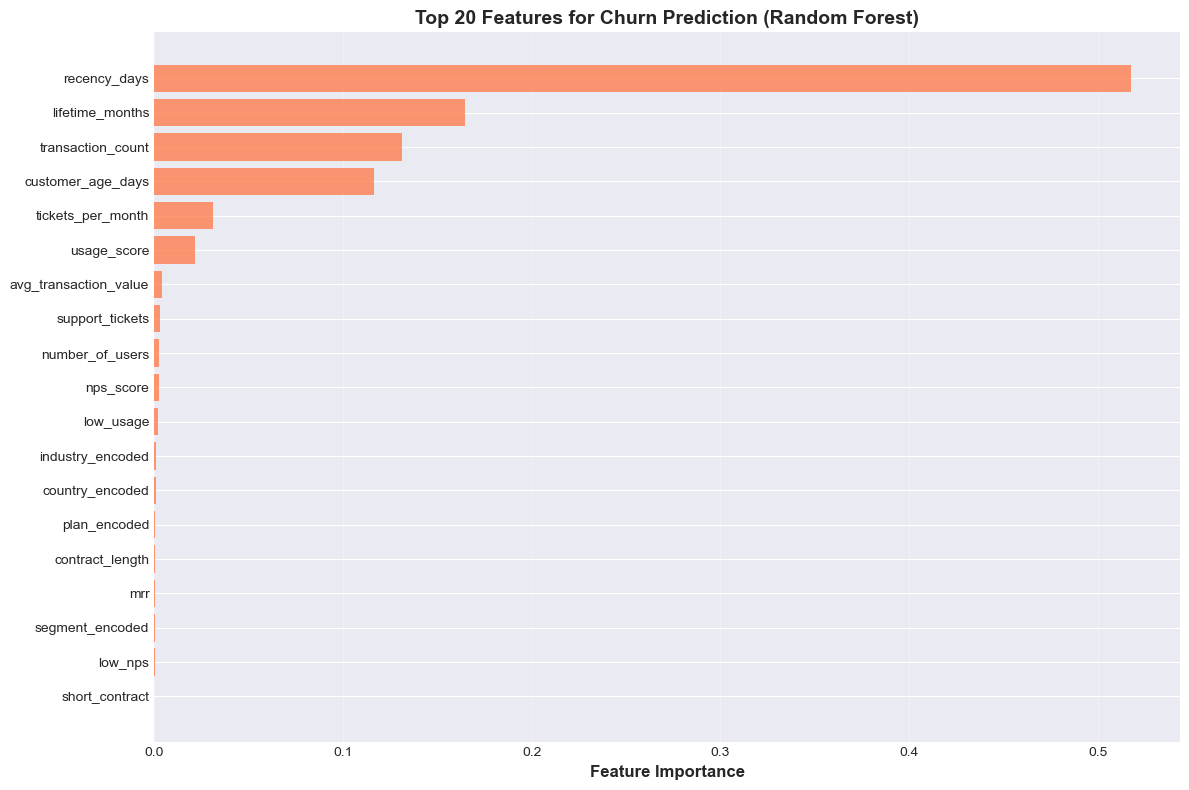


--------------------------------------------------------------------------------
4.7: CUSTOMER RISK STRATIFICATION
--------------------------------------------------------------------------------

 Customer Risk Stratification:

                Total_Customers  Actual_Churned  Churn_Rate  Total_MRR   Total_CLV
risk_category                                                                     
Low Risk                   2675            0.00        0.00     715025 15423618.88
Medium Risk                   4            4.00      100.00        246     3375.74
High Risk                     3            3.00      100.00        897    15331.62
Very High Risk              649          649.00      100.00     157351  2047663.40

 At-Risk Customer Summary:
   • Total At-Risk Customers: 652
   • At-Risk MRR: $158,248.00/month
   • Annual Revenue at Risk: $1,898,976.00
   • Average CLV at Risk: $3,164.10

 Top 50 Highest Risk Customers:
customer_id        segment         plan  mrr  usage_score  nps

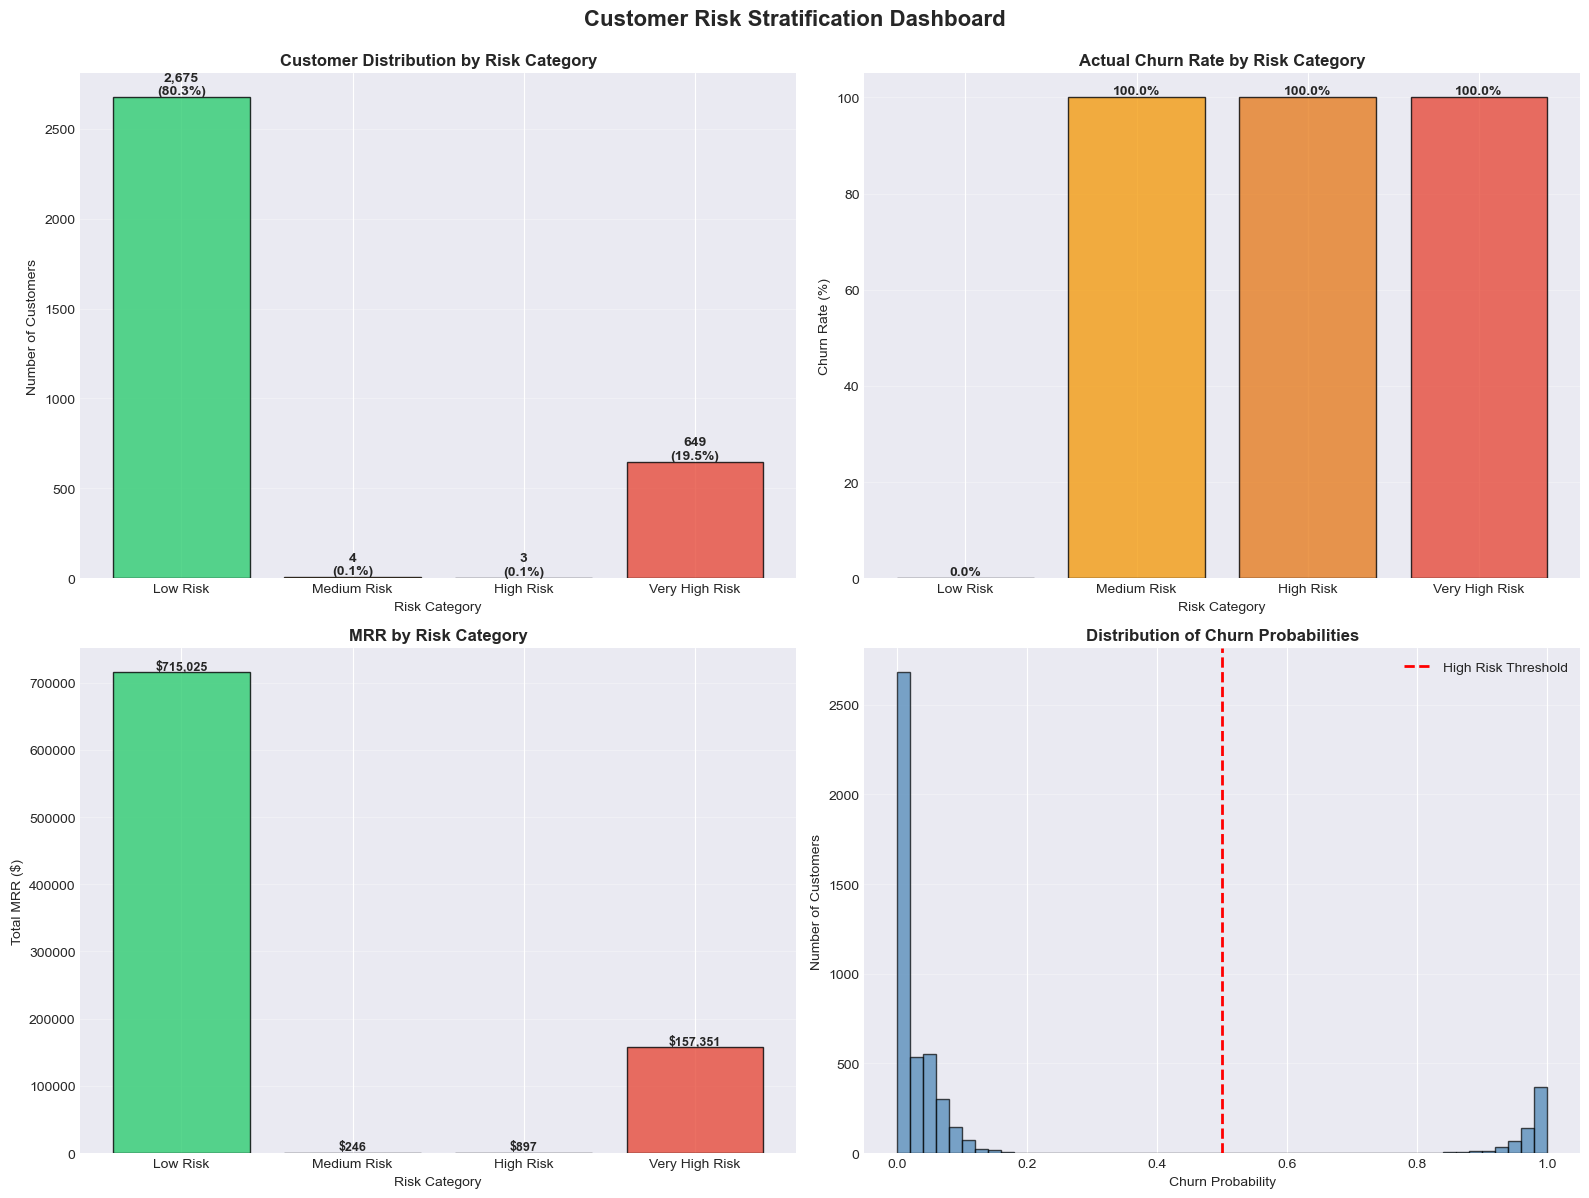


 Churn Analysis Complete!



In [45]:
print("\n" + "="*80)
print("SECTION 4: CUSTOMER CHURN ANALYSIS & PREDICTION")
print("="*80)

print("""
Churn analysis helps us:
1. Identify customers at risk of leaving
2. Understand key churn drivers
3. Calculate financial impact of churn
4. Develop retention strategies

We'll analyze:
  • Churn rates by segment and cohort
  • Predictive models for churn risk
  • Customer lifetime value impact
  • Intervention opportunities
""")

# ========================================================================
# 4.1: CHURN OVERVIEW & STATISTICS
# ========================================================================

print("\n" + "-"*80)
print("4.1: CHURN OVERVIEW & STATISTICS")
print("-"*80)

# Overall churn metrics
total_customers = len(customers)
churned_customers = customers['is_churned'].sum()
active_customers = total_customers - churned_customers
overall_churn_rate = (churned_customers / total_customers) * 100

print(f"\n Overall Churn Metrics:")
print(f"   • Total Customers: {total_customers:,}")
print(f"   • Active Customers: {active_customers:,} ({active_customers/total_customers*100:.1f}%)")
print(f"   • Churned Customers: {churned_customers:,} ({overall_churn_rate:.1f}%)")

# Churn by segment
print(f"\n Churn Rate by Customer Segment:")
churn_by_segment = customers.groupby('segment').agg({
    'is_churned': ['sum', 'mean', 'count']
})
churn_by_segment.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_segment['Churn_Rate'] = churn_by_segment['Churn_Rate'] * 100
churn_by_segment = churn_by_segment.sort_values('Churn_Rate', ascending=False)
print(churn_by_segment.to_string())

# Churn by plan
print(f"\n Churn Rate by Subscription Plan:")
churn_by_plan = customers.groupby('plan').agg({
    'is_churned': ['sum', 'mean', 'count']
})
churn_by_plan.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_plan['Churn_Rate'] = churn_by_plan['Churn_Rate'] * 100
churn_by_plan = churn_by_plan.sort_values('Churn_Rate', ascending=False)
print(churn_by_plan.to_string())

# Financial impact of churn
churned_mrr = customers[customers['is_churned'] == 1]['mrr'].sum()
churned_clv = customers[customers['is_churned'] == 1]['clv'].sum()

print(f"\n Financial Impact of Churn:")
print(f"   • Lost MRR: ${churned_mrr:,.2f}/month")
print(f"   • Annual Revenue Impact: ${churned_mrr * 12:,.2f}/year")
print(f"   • Total CLV Lost: ${churned_clv:,.2f}")

# ========================================================================
# 4.2: CHURN ANALYSIS VISUALIZATIONS
# ========================================================================

print("\n" + "-"*80)
print("4.2: CHURN ANALYSIS VISUALIZATIONS")
print("-"*80)

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Churn Rate by Segment
ax1 = fig.add_subplot(gs[0, 0])
colors_churn = ['#e74c3c' if x > overall_churn_rate else '#2ecc71' 
                for x in churn_by_segment['Churn_Rate']]
ax1.bar(churn_by_segment.index, churn_by_segment['Churn_Rate'], 
        color=colors_churn, alpha=0.8, edgecolor='black')
ax1.axhline(y=overall_churn_rate, color='blue', linestyle='--', 
            label=f'Overall: {overall_churn_rate:.1f}%', linewidth=2)
ax1.set_title('Churn Rate by Segment', fontweight='bold', fontsize=12)
ax1.set_ylabel('Churn Rate (%)')
ax1.set_xlabel('Segment')
for i, v in enumerate(churn_by_segment['Churn_Rate']):
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Churn Rate by Contract Length
ax2 = fig.add_subplot(gs[0, 1])
churn_by_contract = customers.groupby('contract_length')['is_churned'].mean() * 100
churn_by_contract = churn_by_contract.sort_index()
ax2.plot(churn_by_contract.index, churn_by_contract.values, 
         marker='o', linewidth=2.5, markersize=10, color='#e74c3c')
ax2.set_title('Churn Rate by Contract Length', fontweight='bold', fontsize=12)
ax2.set_xlabel('Contract Length (months)')
ax2.set_ylabel('Churn Rate (%)')
ax2.grid(True, alpha=0.3)
for x, y in zip(churn_by_contract.index, churn_by_contract.values):
    ax2.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Usage Score Distribution: Churned vs Active
ax3 = fig.add_subplot(gs[0, 2])
churned_usage = customers[customers['is_churned'] == 1]['usage_score']
active_usage = customers[customers['is_churned'] == 0]['usage_score']
ax3.hist([active_usage, churned_usage], bins=25, label=['Active', 'Churned'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax3.axvline(active_usage.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Active Mean: {active_usage.mean():.1f}')
ax3.axvline(churned_usage.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Churned Mean: {churned_usage.mean():.1f}')
ax3.set_title('Usage Score: Active vs Churned', fontweight='bold', fontsize=12)
ax3.set_xlabel('Usage Score')
ax3.set_ylabel('Number of Customers')
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. NPS Score Distribution
ax4 = fig.add_subplot(gs[1, 0])
churned_nps = customers[customers['is_churned'] == 1]['nps_score']
active_nps = customers[customers['is_churned'] == 0]['nps_score']
ax4.hist([active_nps, churned_nps], bins=25, label=['Active', 'Churned'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.axvline(active_nps.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Active Mean: {active_nps.mean():.1f}')
ax4.axvline(churned_nps.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Churned Mean: {churned_nps.mean():.1f}')
ax4.set_title('NPS Score: Active vs Churned', fontweight='bold', fontsize=12)
ax4.set_xlabel('NPS Score')
ax4.set_ylabel('Number of Customers')
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# 5. Support Tickets vs Churn
ax5 = fig.add_subplot(gs[1, 1])
churn_by_tickets = customers.groupby('support_tickets')['is_churned'].mean() * 100
ax5.bar(churn_by_tickets.index, churn_by_tickets.values, 
        color='#e74c3c', alpha=0.7, edgecolor='black')
ax5.set_title('Churn Rate by Support Tickets', fontweight='bold', fontsize=12)
ax5.set_xlabel('Number of Support Tickets')
ax5.set_ylabel('Churn Rate (%)')
ax5.grid(axis='y', alpha=0.3)

# 6. Customer Lifetime by Churn Status
ax6 = fig.add_subplot(gs[1, 2])
churned_lifetime = customers[customers['is_churned'] == 1]['lifetime_months']
active_lifetime = customers[customers['is_churned'] == 0]['lifetime_months']
bp = ax6.boxplot([active_lifetime, churned_lifetime], 
                  labels=['Active', 'Churned'],
                  patch_artist=True,
                  showmeans=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax6.set_title('Customer Lifetime Distribution', fontweight='bold', fontsize=12)
ax6.set_ylabel('Lifetime (months)')
ax6.grid(axis='y', alpha=0.3)

# 7. Churn by Industry
ax7 = fig.add_subplot(gs[2, :])
churn_by_industry = customers.groupby('industry').agg({
    'is_churned': ['mean', 'count']
})
churn_by_industry.columns = ['Churn_Rate', 'Count']
churn_by_industry = churn_by_industry[churn_by_industry['Count'] >= 50]  # Filter small groups
churn_by_industry['Churn_Rate'] = churn_by_industry['Churn_Rate'] * 100
churn_by_industry = churn_by_industry.sort_values('Churn_Rate', ascending=True)

colors_industry = ['#e74c3c' if x > overall_churn_rate else '#2ecc71' 
                   for x in churn_by_industry['Churn_Rate']]
ax7.barh(churn_by_industry.index, churn_by_industry['Churn_Rate'],
         color=colors_industry, alpha=0.7, edgecolor='black')
ax7.axvline(x=overall_churn_rate, color='blue', linestyle='--',
            label=f'Overall: {overall_churn_rate:.1f}%', linewidth=2)
ax7.set_title('Churn Rate by Industry', fontweight='bold', fontsize=12)
ax7.set_xlabel('Churn Rate (%)')
ax7.legend()
ax7.grid(axis='x', alpha=0.3)
for i, v in enumerate(churn_by_industry['Churn_Rate']):
    ax7.text(v, i, f' {v:.1f}%', va='center', fontweight='bold', fontsize=9)

plt.suptitle('Customer Churn Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('financial_viz/07_churn_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/07_churn_analysis.png")
plt.show()



# ========================================================================
# 4.3: FEATURE ENGINEERING FOR CHURN PREDICTION
# ========================================================================

print("\n" + "-"*80)
print("4.3: FEATURE ENGINEERING FOR CHURN PREDICTION")
print("-"*80)

print("\nCreating predictive features...")

# Create a copy for modeling
churn_model_data = customers.copy()

# Calculate customer age (days since signup)
churn_model_data['customer_age_days'] = (
    pd.to_datetime('2024-12-31') - churn_model_data['signup_date']
).dt.days

# Engagement metrics
churn_model_data['avg_revenue_per_month'] = (
    churn_model_data['total_revenue'] / churn_model_data['lifetime_months']
)

# Tickets per month
churn_model_data['tickets_per_month'] = (
    churn_model_data['support_tickets'] / churn_model_data['lifetime_months']
)

# Low engagement flag
churn_model_data['low_usage'] = (churn_model_data['usage_score'] < 40).astype(int)
churn_model_data['low_nps'] = (churn_model_data['nps_score'] < 0).astype(int)

# Contract risk
churn_model_data['short_contract'] = (churn_model_data['contract_length'] <= 1).astype(int)

print(" Created engagement and risk features")

# Select features for modeling
feature_columns = [
    'mrr', 'contract_length', 'number_of_users', 'support_tickets',
    'usage_score', 'nps_score', 'customer_age_days', 'lifetime_months',
    'transaction_count', 'avg_transaction_value', 'recency_days',
    'tickets_per_month', 'low_usage', 'low_nps', 'short_contract'
]

# Add categorical features (will be encoded)
categorical_features = ['segment', 'industry', 'plan', 'country']

print(f"\n Feature Set:")
print(f"   • Numeric Features: {len(feature_columns)}")
print(f"   • Categorical Features: {len(categorical_features)}")

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    churn_model_data[f'{col}_encoded'] = le.fit_transform(churn_model_data[col].astype(str))
    label_encoders[col] = le
    feature_columns.append(f'{col}_encoded')

print(f"   • Total Features: {len(feature_columns)}")

# Prepare X and y
X = churn_model_data[feature_columns].fillna(0)
y = churn_model_data['is_churned']

print(f"\n Dataset for Modeling:")
print(f"   • Total Samples: {len(X):,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Churned (Class 1): {y.sum():,} ({y.mean()*100:.1f}%)")
print(f"   • Active (Class 0): {(1-y).sum():,} ({(1-y.mean())*100:.1f}%)")


# ========================================================================
# 4.4: TRAIN CHURN PREDICTION MODELS
# ========================================================================

print("\n" + "-"*80)
print("4.4: CHURN PREDICTION MODEL TRAINING")
print("-"*80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"   • Training Set: {len(X_train):,} samples")
print(f"   • Test Set: {len(X_test):,} samples")

# Clean inf/nan before scaling
for df in [X_train, X_test]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.median(), inplace=True)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Training Multiple Models...")

# Dictionary to store models and results
churn_models = {}
churn_results = {}

# 1. Logistic Regression
print("\n Logistic Regression...")
lr_churn = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_churn.fit(X_train_scaled, y_train)
lr_pred = lr_churn.predict(X_test_scaled)
lr_pred_proba = lr_churn.predict_proba(X_test_scaled)[:, 1]

churn_models['Logistic Regression'] = lr_churn
churn_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'precision': precision_score(y_test, lr_pred),
    'recall': recall_score(y_test, lr_pred),
    'f1': f1_score(y_test, lr_pred),
    'roc_auc': roc_auc_score(y_test, lr_pred_proba)
}

print(f"   Accuracy: {churn_results['Logistic Regression']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Logistic Regression']['roc_auc']:.4f}")


# 2. Random Forest
print("\n Random Forest Classifier...")
rf_churn = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_churn.fit(X_train, y_train)
rf_pred = rf_churn.predict(X_test)
rf_pred_proba = rf_churn.predict_proba(X_test)[:, 1]

churn_models['Random Forest'] = rf_churn
churn_results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred),
    'roc_auc': roc_auc_score(y_test, rf_pred_proba)
}

print(f"   Accuracy: {churn_results['Random Forest']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Random Forest']['roc_auc']:.4f}")

# 3. Gradient Boosting
print("\n Gradient Boosting Classifier...")
gb_churn = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_churn.fit(X_train, y_train)
gb_pred = gb_churn.predict(X_test)
gb_pred_proba = gb_churn.predict_proba(X_test)[:, 1]

churn_models['Gradient Boosting'] = gb_churn
churn_results['Gradient Boosting'] = {
    'accuracy': accuracy_score(y_test, gb_pred),
    'precision': precision_score(y_test, gb_pred),
    'recall': recall_score(y_test, gb_pred),
    'f1': f1_score(y_test, gb_pred),
    'roc_auc': roc_auc_score(y_test, gb_pred_proba)
}

print(f"   Accuracy: {churn_results['Gradient Boosting']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Gradient Boosting']['roc_auc']:.4f}")

# ========================================================================
# 4.5: MODEL COMPARISON & EVALUATION
# ========================================================================

print("\n" + "-"*80)
print("4.5: MODEL COMPARISON & EVALUATION")
print("-"*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame(churn_results).T
print("\n Model Performance Comparison:\n")
print(comparison_df.round(4))

# Determine best model
best_churn_model_name = comparison_df['roc_auc'].idxmax()
print(f"\n Best Model: {best_churn_model_name}")
print(f"   ROC AUC: {comparison_df.loc[best_churn_model_name, 'roc_auc']:.4f}")

# Get best model predictions
if best_churn_model_name == 'Logistic Regression':
    best_pred = lr_pred
    best_pred_proba = lr_pred_proba
elif best_churn_model_name == 'Random Forest':
    best_pred = rf_pred
    best_pred_proba = rf_pred_proba
else:
    best_pred = gb_pred
    best_pred_proba = gb_pred_proba

# Detailed classification report
print("\n" + "-"*80)
print(f"DETAILED CLASSIFICATION REPORT - {best_churn_model_name}")
print("-"*80)
print(classification_report(y_test, best_pred, 
                          target_names=['Active', 'Churned'],
                          digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, best_pred)
tn, fp, fn, tp = cm.ravel()

print("\n Confusion Matrix:")
print(f"   • True Negatives (TN): {tn:,} - Correctly predicted active")
print(f"   • False Positives (FP): {fp:,} - Incorrectly predicted churn")
print(f"   • False Negatives (FN): {fn:,} - Missed churns (costly)")
print(f"   • True Positives (TP): {tp:,} - Correctly predicted churn")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Metrics comparison
ax1 = axes[0, 0]
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
comparison_df[metrics_to_plot].T.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Metrics', fontweight='bold', fontsize=12)
ax1.set_ylabel('Score')
ax1.set_xlabel('Metric')
ax1.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'], rotation=45)
ax1.legend(title='Model', loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1])

# 2. ROC Curves
ax2 = axes[0, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)

ax2.plot(fpr_lr, tpr_lr, label=f'LR (AUC={churn_results["Logistic Regression"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#3498db')
ax2.plot(fpr_rf, tpr_rf, label=f'RF (AUC={churn_results["Random Forest"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#e74c3c')
ax2.plot(fpr_gb, tpr_gb, label=f'GB (AUC={churn_results["Gradient Boosting"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#2ecc71')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curves - Churn Prediction', fontweight='bold', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', ax=ax3,
            xticklabels=['Active', 'Churned'],
            yticklabels=['Active', 'Churned'],
            cbar_kws={'label': 'Count'})
ax3.set_title(f'Confusion Matrix - {best_churn_model_name}', fontweight='bold', fontsize=12)
ax3.set_ylabel('True Label', fontweight='bold')
ax3.set_xlabel('Predicted Label', fontweight='bold')

# 4. Probability Distribution
ax4 = axes[1, 1]
churned_probs = best_pred_proba[y_test == 1]
active_probs = best_pred_proba[y_test == 0]
ax4.hist([active_probs, churned_probs], bins=30, 
         label=['Active (Actual)', 'Churned (Actual)'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
ax4.set_title('Churn Probability Distribution', fontweight='bold', fontsize=12)
ax4.set_xlabel('Predicted Churn Probability')
ax4.set_ylabel('Number of Customers')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Churn Prediction Model Evaluation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/08_churn_model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/08_churn_model_evaluation.png")
plt.show()


# ========================================================================
# 4.6: FEATURE IMPORTANCE ANALYSIS
# ========================================================================

print("\n" + "-"*80)
print("4.6: FEATURE IMPORTANCE ANALYSIS")
print("-"*80)

# Get feature importance from Random Forest (most interpretable)
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_churn.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Top 15 Most Important Features for Churn Prediction:\n")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='coral', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontweight='bold', fontsize=12)
plt.title('Top 20 Features for Churn Prediction (Random Forest)', 
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('financial_viz/09_churn_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/09_churn_feature_importance.png")
plt.show()

# ========================================================================
# 4.7: CUSTOMER RISK STRATIFICATION
# ========================================================================

print("\n" + "-"*80)
print("4.7: CUSTOMER RISK STRATIFICATION")
print("-"*80)

# Clean the data before prediction
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Add predictions to full dataset
churn_model_data['churn_probability'] = churn_models[best_churn_model_name].predict_proba(
    X.fillna(0) if best_churn_model_name == 'Logistic Regression' 
    else X.fillna(0)
)[:, 1] if best_churn_model_name != 'Logistic Regression' else churn_models[best_churn_model_name].predict_proba(
    scaler.transform(X.fillna(0))
)[:, 1]

# Create risk categories
churn_model_data['risk_category'] = pd.cut(
    churn_model_data['churn_probability'],
    bins=[0, 0.25, 0.50, 0.75, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
)

# Analyze risk categories
risk_analysis = churn_model_data.groupby('risk_category').agg({
    'customer_id': 'count',
    'is_churned': ['sum', 'mean'],
    'mrr': 'sum',
    'clv': 'sum'
})
risk_analysis.columns = ['Total_Customers', 'Actual_Churned', 'Churn_Rate', 'Total_MRR', 'Total_CLV']
risk_analysis['Churn_Rate'] = risk_analysis['Churn_Rate'] * 100

print("\n Customer Risk Stratification:\n")
print(risk_analysis.to_string())

# At-risk customers (High + Very High Risk)
at_risk = churn_model_data[churn_model_data['churn_probability'] >= 0.5]
at_risk_mrr = at_risk['mrr'].sum()

print(f"\n At-Risk Customer Summary:")
print(f"   • Total At-Risk Customers: {len(at_risk):,}")
print(f"   • At-Risk MRR: ${at_risk_mrr:,.2f}/month")
print(f"   • Annual Revenue at Risk: ${at_risk_mrr * 12:,.2f}")
print(f"   • Average CLV at Risk: ${at_risk['clv'].mean():,.2f}")

# Top 50 highest risk customers
top_risk_customers = churn_model_data.nlargest(50, 'churn_probability')[[
    'customer_id', 'segment', 'plan', 'mrr', 'usage_score', 
    'nps_score', 'churn_probability', 'risk_category'
]]

print(f"\n Top 50 Highest Risk Customers:")F
print(top_risk_customers.head(20).to_string(index=False))

# Save at-risk customer list
at_risk_export = churn_model_data[churn_model_data['churn_probability'] >= 0.5][[
    'customer_id', 'segment', 'industry', 'plan', 'mrr', 'clv',
    'usage_score', 'nps_score', 'support_tickets', 'churn_probability', 'risk_category'
]].sort_values('churn_probability', ascending=False)

at_risk_export.to_csv('at_risk_customers.csv', index=False)
print(f"\n Saved at-risk customer list to: 'at_risk_customers.csv'")


# Visualize risk stratification
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Customer distribution by risk
ax1 = axes[0, 0]
risk_counts = risk_analysis['Total_Customers']
colors_risk = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
ax1.bar(risk_counts.index, risk_counts.values, color=colors_risk, alpha=0.8, edgecolor='black')
ax1.set_title('Customer Distribution by Risk Category', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Risk Category')
for i, v in enumerate(risk_counts.values):
    ax1.text(i, v, f'{v:,}\n({v/risk_counts.sum()*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Actual churn rate by risk category
ax2 = axes[0, 1]
ax2.bar(risk_analysis.index, risk_analysis['Churn_Rate'], 
        color=colors_risk, alpha=0.8, edgecolor='black')
ax2.set_title('Actual Churn Rate by Risk Category', fontweight='bold', fontsize=12)
ax2.set_ylabel('Churn Rate (%)')
ax2.set_xlabel('Risk Category')
for i, v in enumerate(risk_analysis['Churn_Rate']):
    ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. MRR at risk
ax3 = axes[1, 0]
ax3.bar(risk_analysis.index, risk_analysis['Total_MRR'], 
        color=colors_risk, alpha=0.8, edgecolor='black')
ax3.set_title('MRR by Risk Category', fontweight='bold', fontsize=12)
ax3.set_ylabel('Total MRR ($)')
ax3.set_xlabel('Risk Category')
for i, v in enumerate(risk_analysis['Total_MRR']):
    ax3.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. Churn probability distribution
ax4 = axes[1, 1]
ax4.hist(churn_model_data['churn_probability'], bins=50, color='steelblue', 
         alpha=0.7, edgecolor='black')
ax4.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='High Risk Threshold')
ax4.set_title('Distribution of Churn Probabilities', fontweight='bold', fontsize=12)
ax4.set_xlabel('Churn Probability')
ax4.set_ylabel('Number of Customers')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Customer Risk Stratification Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/10_risk_stratification.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/10_risk_stratification.png")
plt.show()

print("\n Churn Analysis Complete!")
print("="*80 + "\n")



Churn analysis helps us:
1. Identify customers at risk of leaving
2. Understand key churn drivers
3. Calculate financial impact of churn
4. Develop retention strategies

We'll analyze:
  • Churn rates by segment and cohort
  • Predictive models for churn risk
  • Customer lifetime value impact
  • Intervention opportunities


--------------------------------------------------------------------------------
4.1: CHURN OVERVIEW & STATISTICS
--------------------------------------------------------------------------------

 Overall Churn Metrics:
   • Total Customers: 5,000
   • Active Customers: 4,344.0 (86.9%)
   • Churned Customers: 656.0 (13.1%)

 Churn Rate by Customer Segment:
                Churned_Count  Churn_Rate  Total_Customers
segment                                                   
Mid-Market             172.00       13.67             1258
Enterprise              68.00       13.26              513
Startup                163.00       13.19             1236
Small Business   

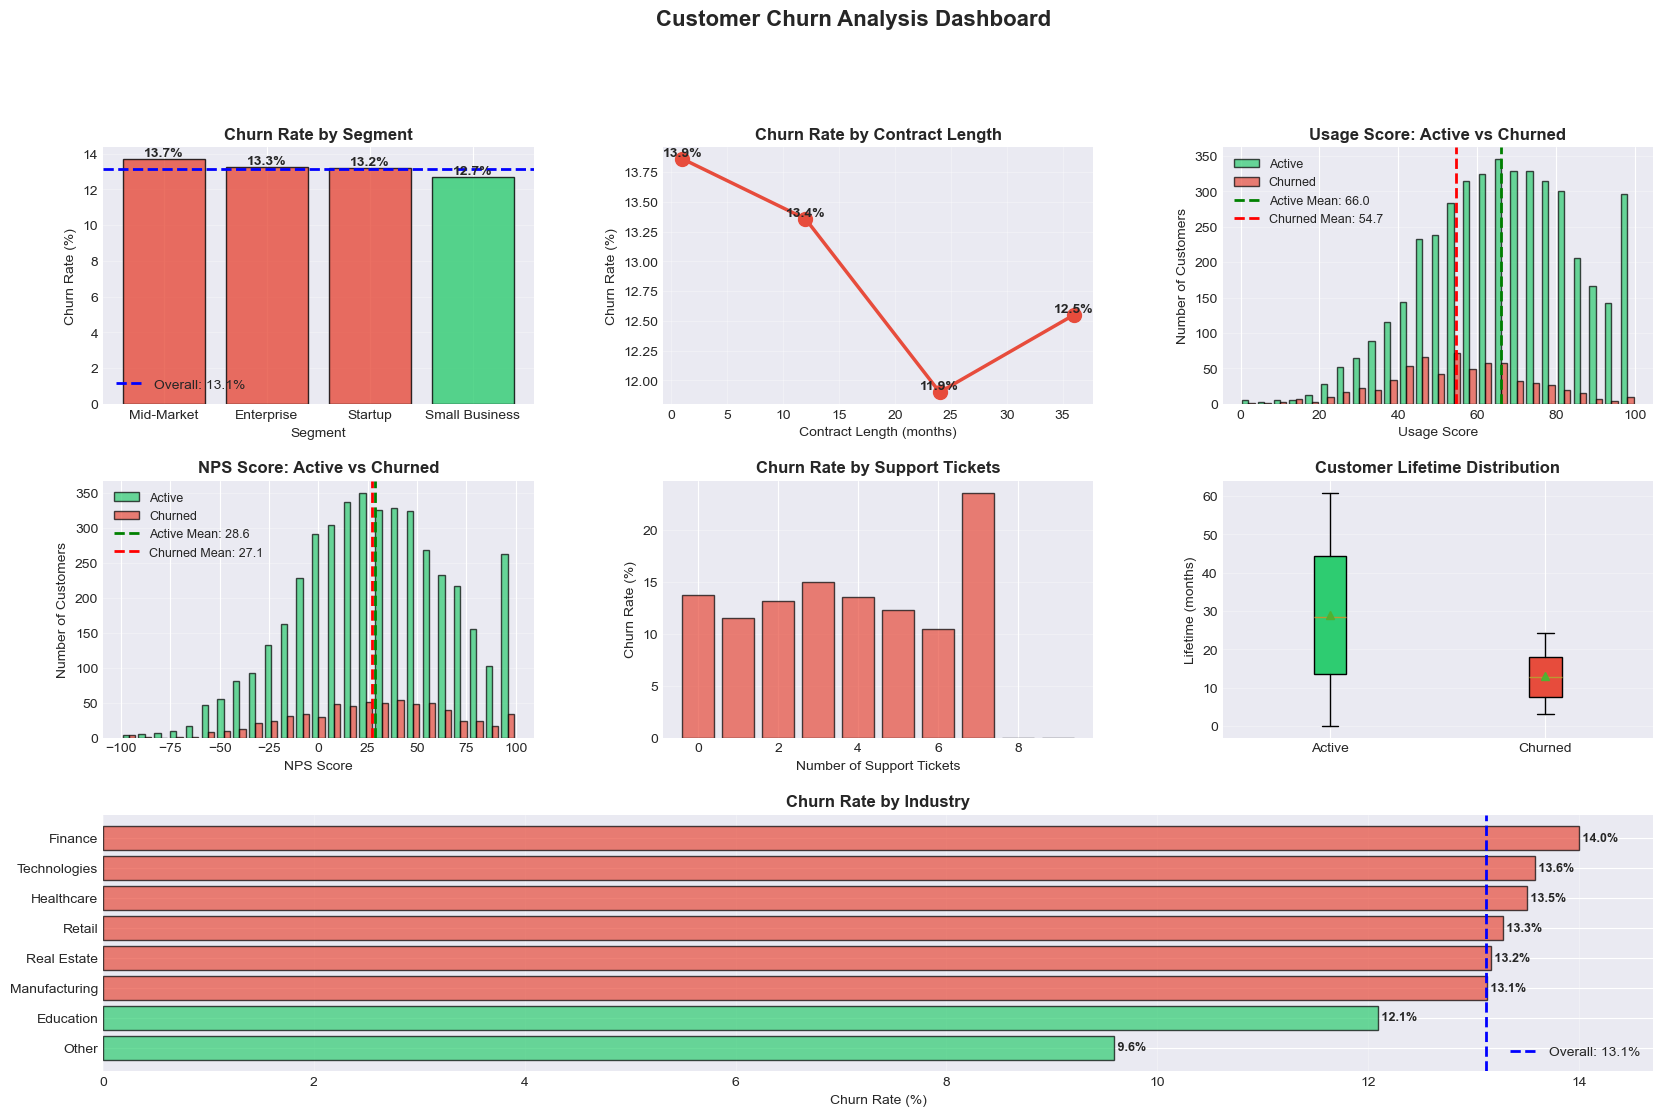


--------------------------------------------------------------------------------
4.3: FEATURE ENGINEERING FOR CHURN PREDICTION
--------------------------------------------------------------------------------

Creating predictive features...
 Created engagement and risk features

 Feature Set:
   • Numeric Features: 15
   • Categorical Features: 4
   • Total Features: 19

 Dataset for Modeling:
   • Total Samples: 5,000
   • Features: 19
   • Churned (Class 1): 656.0 (13.1%)
   • Active (Class 0): 4,344.0 (86.9%)

--------------------------------------------------------------------------------
4.4: CHURN PREDICTION MODEL TRAINING
--------------------------------------------------------------------------------

Data Split:
   • Training Set: 4,000 samples
   • Test Set: 1,000 samples

 Training Multiple Models...

 Logistic Regression...
   Accuracy: 0.9980
   ROC AUC: 0.9945

 Random Forest Classifier...
   Accuracy: 1.0000
   ROC AUC: 1.0000

 Gradient Boosting Classifier...
   Accura

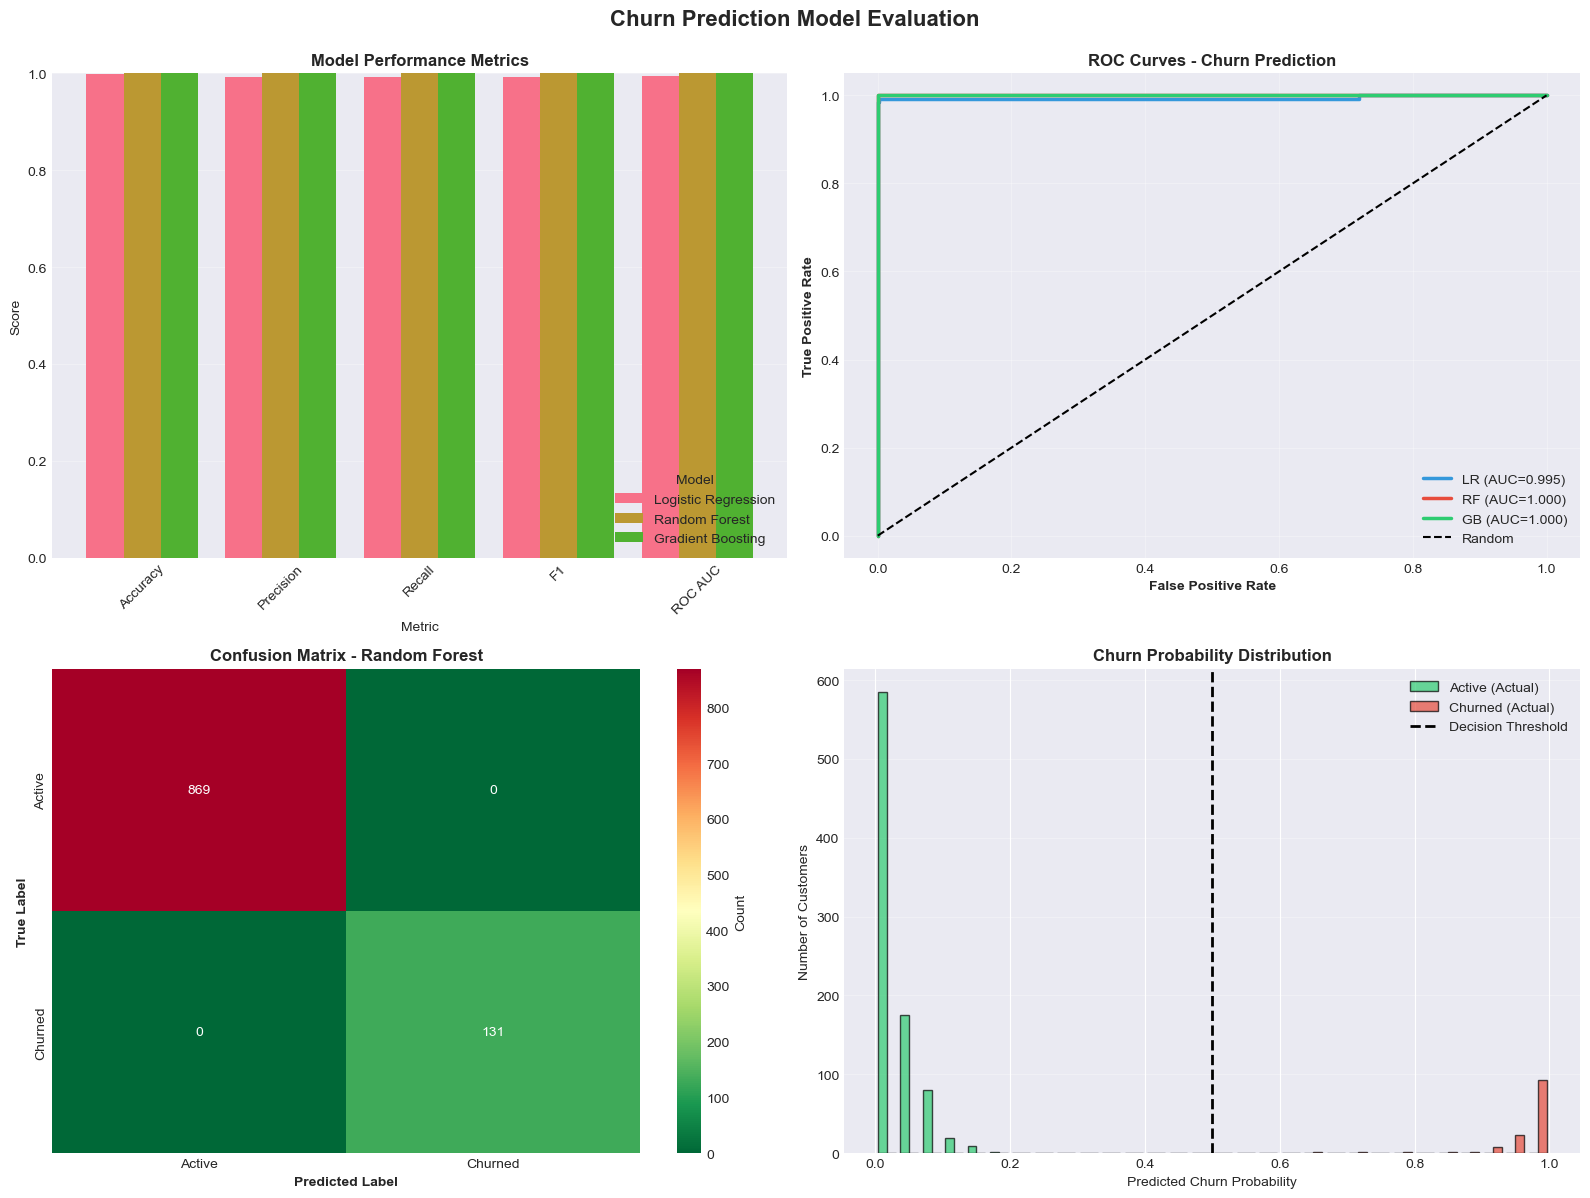


--------------------------------------------------------------------------------
4.6: FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

 Top 15 Most Important Features for Churn Prediction:

              feature  importance
         recency_days        0.52
      lifetime_months        0.16
    transaction_count        0.13
    customer_age_days        0.12
    tickets_per_month        0.03
          usage_score        0.02
avg_transaction_value        0.00
      support_tickets        0.00
      number_of_users        0.00
            nps_score        0.00
            low_usage        0.00
     industry_encoded        0.00
      country_encoded        0.00
         plan_encoded        0.00
      contract_length        0.00

 Saved: financial_viz/09_churn_feature_importance.png


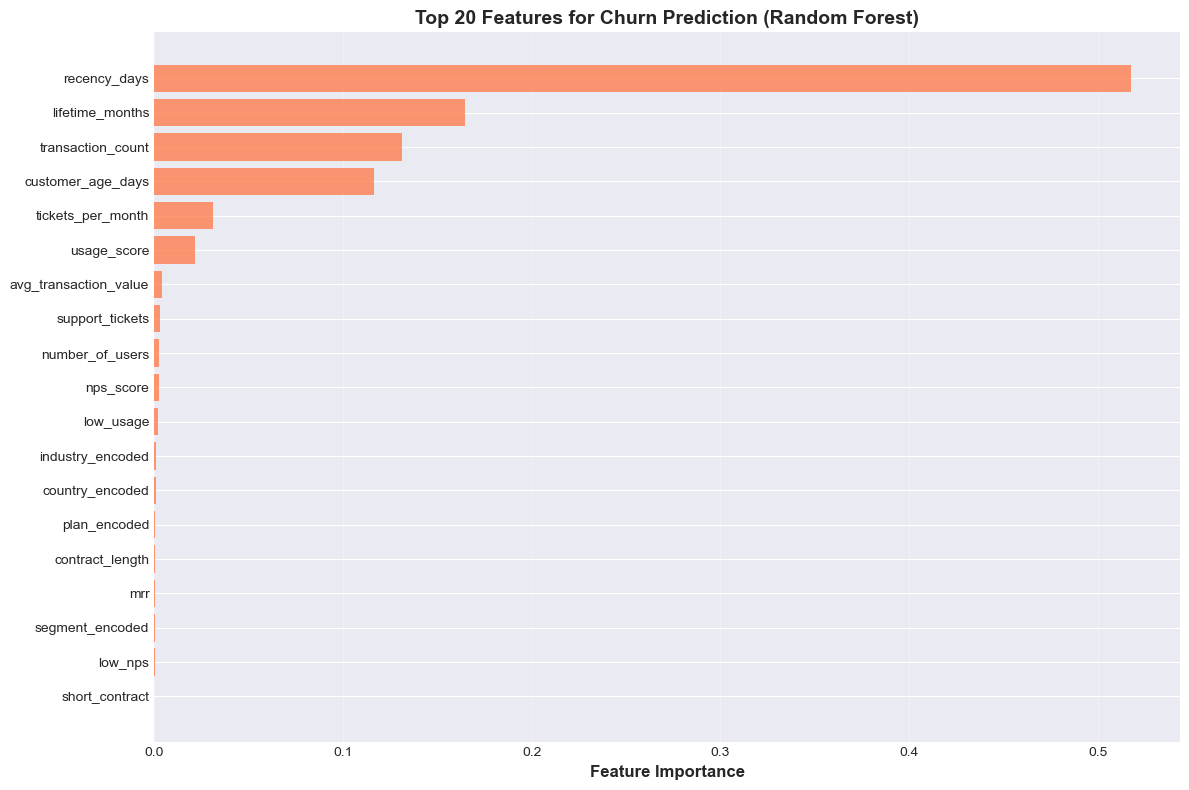


--------------------------------------------------------------------------------
4.7: CUSTOMER RISK STRATIFICATION
--------------------------------------------------------------------------------

 Customer Risk Stratification:

                Total_Customers  Actual_Churned  Churn_Rate  Total_MRR   Total_CLV
risk_category                                                                     
Low Risk                   2675            0.00        0.00     715025 15423618.88
Medium Risk                   4            4.00      100.00        246     3375.74
High Risk                     3            3.00      100.00        897    15331.62
Very High Risk              649          649.00      100.00     157351  2047663.40

 At-Risk Customer Summary:
   • Total At-Risk Customers: 652
   • At-Risk MRR: $158,248.00/month
   • Annual Revenue at Risk: $1,898,976.00
   • Average CLV at Risk: $3,164.10

 Top 50 Highest Risk Customers:
customer_id        segment         plan  mrr  usage_score  nps

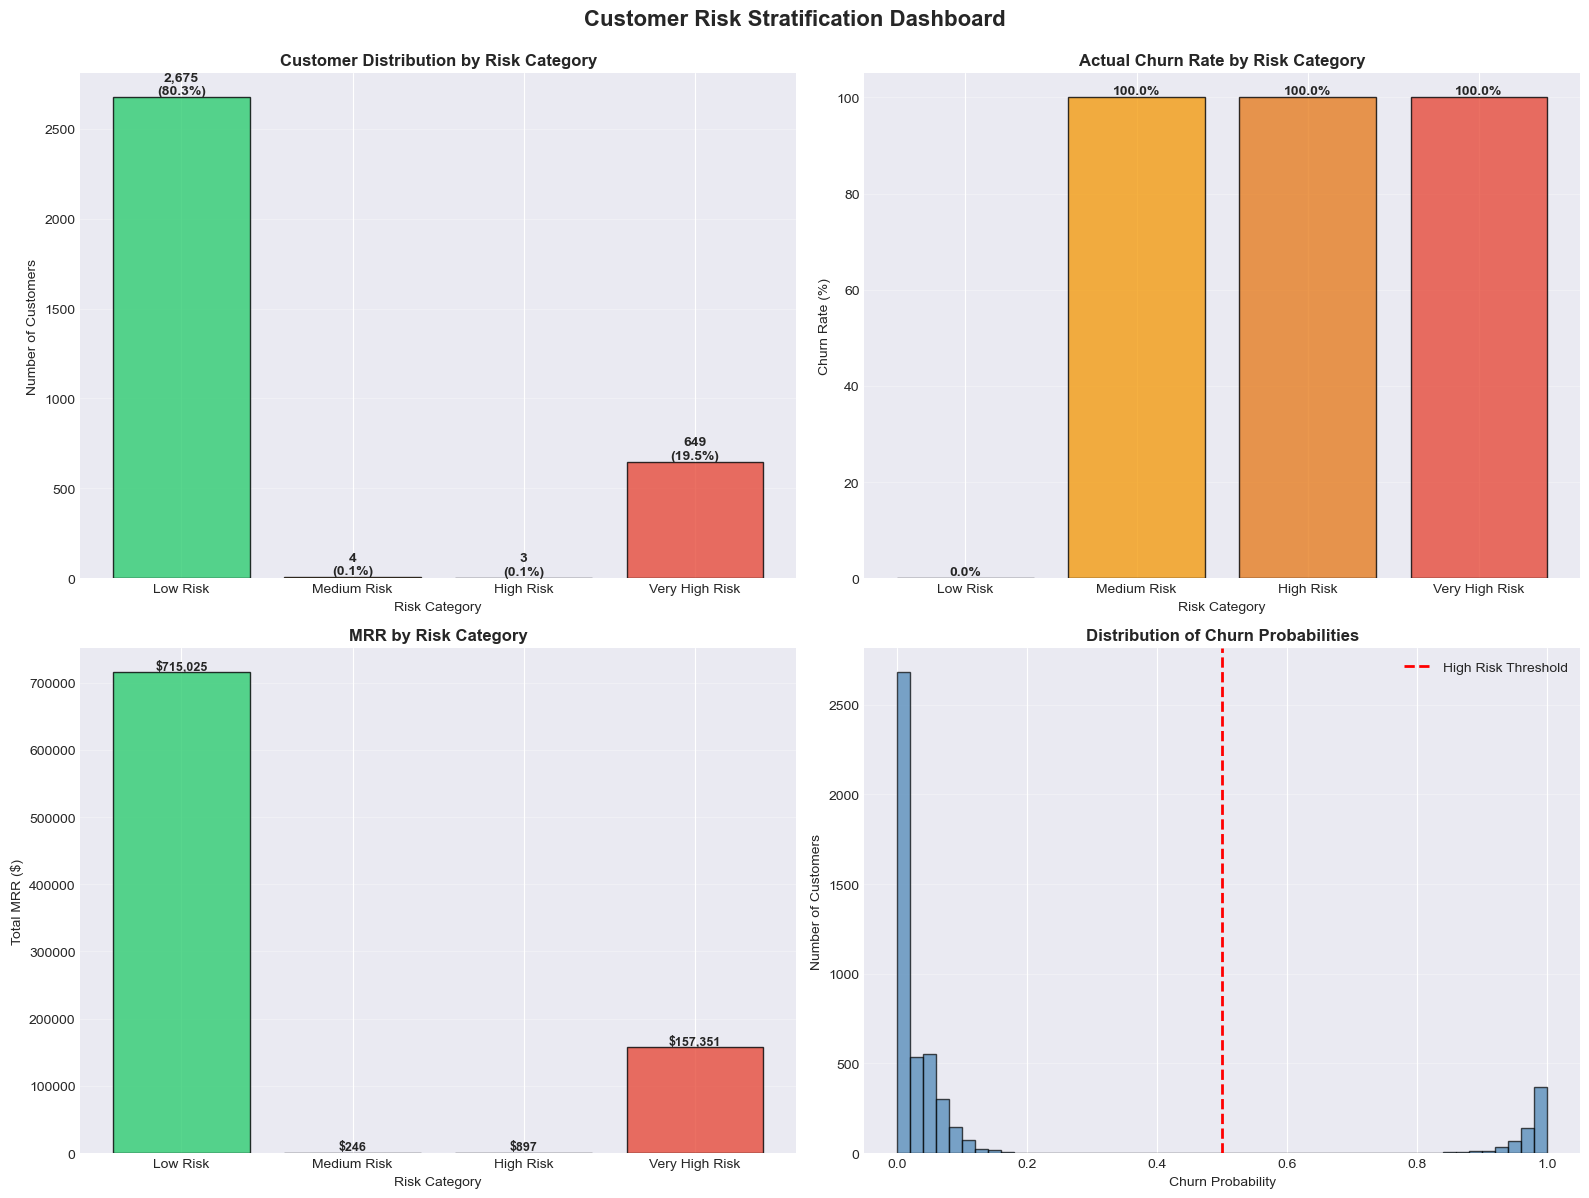


 Churn Analysis Complete!



In [46]:

print("""
Churn analysis helps us:
1. Identify customers at risk of leaving
2. Understand key churn drivers
3. Calculate financial impact of churn
4. Develop retention strategies

We'll analyze:
  • Churn rates by segment and cohort
  • Predictive models for churn risk
  • Customer lifetime value impact
  • Intervention opportunities
""")

# ========================================================================
# 4.1: CHURN OVERVIEW & STATISTICS
# ========================================================================

print("\n" + "-"*80)
print("4.1: CHURN OVERVIEW & STATISTICS")
print("-"*80)

# Overall churn metrics
total_customers = len(customers)
churned_customers = customers['is_churned'].sum()
active_customers = total_customers - churned_customers
overall_churn_rate = (churned_customers / total_customers) * 100

print(f"\n Overall Churn Metrics:")
print(f"   • Total Customers: {total_customers:,}")
print(f"   • Active Customers: {active_customers:,} ({active_customers/total_customers*100:.1f}%)")
print(f"   • Churned Customers: {churned_customers:,} ({overall_churn_rate:.1f}%)")

# Churn by segment
print(f"\n Churn Rate by Customer Segment:")
churn_by_segment = customers.groupby('segment').agg({
    'is_churned': ['sum', 'mean', 'count']
})
churn_by_segment.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_segment['Churn_Rate'] = churn_by_segment['Churn_Rate'] * 100
churn_by_segment = churn_by_segment.sort_values('Churn_Rate', ascending=False)
print(churn_by_segment.to_string())

# Churn by plan
print(f"\n Churn Rate by Subscription Plan:")
churn_by_plan = customers.groupby('plan').agg({
    'is_churned': ['sum', 'mean', 'count']
})
churn_by_plan.columns = ['Churned_Count', 'Churn_Rate', 'Total_Customers']
churn_by_plan['Churn_Rate'] = churn_by_plan['Churn_Rate'] * 100
churn_by_plan = churn_by_plan.sort_values('Churn_Rate', ascending=False)
print(churn_by_plan.to_string())

# Financial impact of churn
churned_mrr = customers[customers['is_churned'] == 1]['mrr'].sum()
churned_clv = customers[customers['is_churned'] == 1]['clv'].sum()

print(f"\n Financial Impact of Churn:")
print(f"   • Lost MRR: ${churned_mrr:,.2f}/month")
print(f"   • Annual Revenue Impact: ${churned_mrr * 12:,.2f}/year")
print(f"   • Total CLV Lost: ${churned_clv:,.2f}")

# ========================================================================
# 4.2: CHURN ANALYSIS VISUALIZATIONS
# ========================================================================

print("\n" + "-"*80)
print("4.2: CHURN ANALYSIS VISUALIZATIONS")
print("-"*80)

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Churn Rate by Segment
ax1 = fig.add_subplot(gs[0, 0])
colors_churn = ['#e74c3c' if x > overall_churn_rate else '#2ecc71' 
                for x in churn_by_segment['Churn_Rate']]
ax1.bar(churn_by_segment.index, churn_by_segment['Churn_Rate'], 
        color=colors_churn, alpha=0.8, edgecolor='black')
ax1.axhline(y=overall_churn_rate, color='blue', linestyle='--', 
            label=f'Overall: {overall_churn_rate:.1f}%', linewidth=2)
ax1.set_title('Churn Rate by Segment', fontweight='bold', fontsize=12)
ax1.set_ylabel('Churn Rate (%)')
ax1.set_xlabel('Segment')
for i, v in enumerate(churn_by_segment['Churn_Rate']):
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Churn Rate by Contract Length
ax2 = fig.add_subplot(gs[0, 1])
churn_by_contract = customers.groupby('contract_length')['is_churned'].mean() * 100
churn_by_contract = churn_by_contract.sort_index()
ax2.plot(churn_by_contract.index, churn_by_contract.values, 
         marker='o', linewidth=2.5, markersize=10, color='#e74c3c')
ax2.set_title('Churn Rate by Contract Length', fontweight='bold', fontsize=12)
ax2.set_xlabel('Contract Length (months)')
ax2.set_ylabel('Churn Rate (%)')
ax2.grid(True, alpha=0.3)
for x, y in zip(churn_by_contract.index, churn_by_contract.values):
    ax2.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Usage Score Distribution: Churned vs Active
ax3 = fig.add_subplot(gs[0, 2])
churned_usage = customers[customers['is_churned'] == 1]['usage_score']
active_usage = customers[customers['is_churned'] == 0]['usage_score']
ax3.hist([active_usage, churned_usage], bins=25, label=['Active', 'Churned'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax3.axvline(active_usage.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Active Mean: {active_usage.mean():.1f}')
ax3.axvline(churned_usage.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Churned Mean: {churned_usage.mean():.1f}')
ax3.set_title('Usage Score: Active vs Churned', fontweight='bold', fontsize=12)
ax3.set_xlabel('Usage Score')
ax3.set_ylabel('Number of Customers')
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. NPS Score Distribution
ax4 = fig.add_subplot(gs[1, 0])
churned_nps = customers[customers['is_churned'] == 1]['nps_score']
active_nps = customers[customers['is_churned'] == 0]['nps_score']
ax4.hist([active_nps, churned_nps], bins=25, label=['Active', 'Churned'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.axvline(active_nps.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Active Mean: {active_nps.mean():.1f}')
ax4.axvline(churned_nps.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Churned Mean: {churned_nps.mean():.1f}')
ax4.set_title('NPS Score: Active vs Churned', fontweight='bold', fontsize=12)
ax4.set_xlabel('NPS Score')
ax4.set_ylabel('Number of Customers')
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# 5. Support Tickets vs Churn
ax5 = fig.add_subplot(gs[1, 1])
churn_by_tickets = customers.groupby('support_tickets')['is_churned'].mean() * 100
ax5.bar(churn_by_tickets.index, churn_by_tickets.values, 
        color='#e74c3c', alpha=0.7, edgecolor='black')
ax5.set_title('Churn Rate by Support Tickets', fontweight='bold', fontsize=12)
ax5.set_xlabel('Number of Support Tickets')
ax5.set_ylabel('Churn Rate (%)')
ax5.grid(axis='y', alpha=0.3)

# 6. Customer Lifetime by Churn Status
ax6 = fig.add_subplot(gs[1, 2])
churned_lifetime = customers[customers['is_churned'] == 1]['lifetime_months']
active_lifetime = customers[customers['is_churned'] == 0]['lifetime_months']
bp = ax6.boxplot([active_lifetime, churned_lifetime], 
                  labels=['Active', 'Churned'],
                  patch_artist=True,
                  showmeans=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax6.set_title('Customer Lifetime Distribution', fontweight='bold', fontsize=12)
ax6.set_ylabel('Lifetime (months)')
ax6.grid(axis='y', alpha=0.3)

# 7. Churn by Industry
ax7 = fig.add_subplot(gs[2, :])
churn_by_industry = customers.groupby('industry').agg({
    'is_churned': ['mean', 'count']
})
churn_by_industry.columns = ['Churn_Rate', 'Count']
churn_by_industry = churn_by_industry[churn_by_industry['Count'] >= 50]  # Filter small groups
churn_by_industry['Churn_Rate'] = churn_by_industry['Churn_Rate'] * 100
churn_by_industry = churn_by_industry.sort_values('Churn_Rate', ascending=True)

colors_industry = ['#e74c3c' if x > overall_churn_rate else '#2ecc71' 
                   for x in churn_by_industry['Churn_Rate']]
ax7.barh(churn_by_industry.index, churn_by_industry['Churn_Rate'],
         color=colors_industry, alpha=0.7, edgecolor='black')
ax7.axvline(x=overall_churn_rate, color='blue', linestyle='--',
            label=f'Overall: {overall_churn_rate:.1f}%', linewidth=2)
ax7.set_title('Churn Rate by Industry', fontweight='bold', fontsize=12)
ax7.set_xlabel('Churn Rate (%)')
ax7.legend()
ax7.grid(axis='x', alpha=0.3)
for i, v in enumerate(churn_by_industry['Churn_Rate']):
    ax7.text(v, i, f' {v:.1f}%', va='center', fontweight='bold', fontsize=9)

plt.suptitle('Customer Churn Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('financial_viz/07_churn_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/07_churn_analysis.png")
plt.show()

# ========================================================================
# 4.3: FEATURE ENGINEERING FOR CHURN PREDICTION
# ========================================================================

print("\n" + "-"*80)
print("4.3: FEATURE ENGINEERING FOR CHURN PREDICTION")
print("-"*80)

print("\nCreating predictive features...")

# Create a copy for modeling
churn_model_data = customers.copy()

# Calculate customer age (days since signup)
churn_model_data['customer_age_days'] = (
    pd.to_datetime('2024-12-31') - churn_model_data['signup_date']
).dt.days

# Engagement metrics
churn_model_data['avg_revenue_per_month'] = (
    churn_model_data['total_revenue'] / churn_model_data['lifetime_months']
)

# Tickets per month
churn_model_data['tickets_per_month'] = (
    churn_model_data['support_tickets'] / churn_model_data['lifetime_months']
)

# Low engagement flag
churn_model_data['low_usage'] = (churn_model_data['usage_score'] < 40).astype(int)
churn_model_data['low_nps'] = (churn_model_data['nps_score'] < 0).astype(int)

# Contract risk
churn_model_data['short_contract'] = (churn_model_data['contract_length'] <= 1).astype(int)

print(" Created engagement and risk features")

# Select features for modeling
feature_columns = [
    'mrr', 'contract_length', 'number_of_users', 'support_tickets',
    'usage_score', 'nps_score', 'customer_age_days', 'lifetime_months',
    'transaction_count', 'avg_transaction_value', 'recency_days',
    'tickets_per_month', 'low_usage', 'low_nps', 'short_contract'
]

# Add categorical features (will be encoded)
categorical_features = ['segment', 'industry', 'plan', 'country']

print(f"\n Feature Set:")
print(f"   • Numeric Features: {len(feature_columns)}")
print(f"   • Categorical Features: {len(categorical_features)}")

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    churn_model_data[f'{col}_encoded'] = le.fit_transform(churn_model_data[col].astype(str))
    label_encoders[col] = le
    feature_columns.append(f'{col}_encoded')

print(f"   • Total Features: {len(feature_columns)}")

# Prepare X and y
X = churn_model_data[feature_columns].fillna(0)
y = churn_model_data['is_churned']

print(f"\n Dataset for Modeling:")
print(f"   • Total Samples: {len(X):,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Churned (Class 1): {y.sum():,} ({y.mean()*100:.1f}%)")
print(f"   • Active (Class 0): {(1-y).sum():,} ({(1-y.mean())*100:.1f}%)")

# ========================================================================
# 4.4: TRAIN CHURN PREDICTION MODELS
# ========================================================================

print("\n" + "-"*80)
print("4.4: CHURN PREDICTION MODEL TRAINING")
print("-"*80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"   • Training Set: {len(X_train):,} samples")
print(f"   • Test Set: {len(X_test):,} samples")

# Clean inf/nan before scaling
for df in [X_train, X_test]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.median(), inplace=True)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Training Multiple Models...")

# Dictionary to store models and results
churn_models = {}
churn_results = {}

# 1. Logistic Regression
print("\n Logistic Regression...")
lr_churn = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_churn.fit(X_train_scaled, y_train)
lr_pred = lr_churn.predict(X_test_scaled)
lr_pred_proba = lr_churn.predict_proba(X_test_scaled)[:, 1]

churn_models['Logistic Regression'] = lr_churn
churn_results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'precision': precision_score(y_test, lr_pred),
    'recall': recall_score(y_test, lr_pred),
    'f1': f1_score(y_test, lr_pred),
    'roc_auc': roc_auc_score(y_test, lr_pred_proba)
}

print(f"   Accuracy: {churn_results['Logistic Regression']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Logistic Regression']['roc_auc']:.4f}")

# 2. Random Forest
print("\n Random Forest Classifier...")
rf_churn = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_churn.fit(X_train, y_train)
rf_pred = rf_churn.predict(X_test)
rf_pred_proba = rf_churn.predict_proba(X_test)[:, 1]

churn_models['Random Forest'] = rf_churn
churn_results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred),
    'roc_auc': roc_auc_score(y_test, rf_pred_proba)
}

print(f"   Accuracy: {churn_results['Random Forest']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Random Forest']['roc_auc']:.4f}")

# 3. Gradient Boosting
print("\n Gradient Boosting Classifier...")
gb_churn = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_churn.fit(X_train, y_train)
gb_pred = gb_churn.predict(X_test)
gb_pred_proba = gb_churn.predict_proba(X_test)[:, 1]

churn_models['Gradient Boosting'] = gb_churn
churn_results['Gradient Boosting'] = {
    'accuracy': accuracy_score(y_test, gb_pred),
    'precision': precision_score(y_test, gb_pred),
    'recall': recall_score(y_test, gb_pred),
    'f1': f1_score(y_test, gb_pred),
    'roc_auc': roc_auc_score(y_test, gb_pred_proba)
}

print(f"   Accuracy: {churn_results['Gradient Boosting']['accuracy']:.4f}")
print(f"   ROC AUC: {churn_results['Gradient Boosting']['roc_auc']:.4f}")

# ========================================================================
# 4.5: MODEL COMPARISON & EVALUATION
# ========================================================================

print("\n" + "-"*80)
print("4.5: MODEL COMPARISON & EVALUATION")
print("-"*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame(churn_results).T
print("\n Model Performance Comparison:\n")
print(comparison_df.round(4))

# Determine best model
best_churn_model_name = comparison_df['roc_auc'].idxmax()
print(f"\n Best Model: {best_churn_model_name}")
print(f"   ROC AUC: {comparison_df.loc[best_churn_model_name, 'roc_auc']:.4f}")

# Get best model predictions
if best_churn_model_name == 'Logistic Regression':
    best_pred = lr_pred
    best_pred_proba = lr_pred_proba
elif best_churn_model_name == 'Random Forest':
    best_pred = rf_pred
    best_pred_proba = rf_pred_proba
else:
    best_pred = gb_pred
    best_pred_proba = gb_pred_proba

# Detailed classification report
print("\n" + "-"*80)
print(f"DETAILED CLASSIFICATION REPORT - {best_churn_model_name}")
print("-"*80)
print(classification_report(y_test, best_pred, 
                          target_names=['Active', 'Churned'],
                          digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, best_pred)
tn, fp, fn, tp = cm.ravel()

print("\n Confusion Matrix:")
print(f"   • True Negatives (TN): {tn:,} - Correctly predicted active")
print(f"   • False Positives (FP): {fp:,} - Incorrectly predicted churn")
print(f"   • False Negatives (FN): {fn:,} - Missed churns (costly)")
print(f"   • True Positives (TP): {tp:,} - Correctly predicted churn")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Metrics comparison
ax1 = axes[0, 0]
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
comparison_df[metrics_to_plot].T.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Metrics', fontweight='bold', fontsize=12)
ax1.set_ylabel('Score')
ax1.set_xlabel('Metric')
ax1.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'], rotation=45)
ax1.legend(title='Model', loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1])

# 2. ROC Curves
ax2 = axes[0, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_proba)

ax2.plot(fpr_lr, tpr_lr, label=f'LR (AUC={churn_results["Logistic Regression"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#3498db')
ax2.plot(fpr_rf, tpr_rf, label=f'RF (AUC={churn_results["Random Forest"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#e74c3c')
ax2.plot(fpr_gb, tpr_gb, label=f'GB (AUC={churn_results["Gradient Boosting"]["roc_auc"]:.3f})',
         linewidth=2.5, color='#2ecc71')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curves - Churn Prediction', fontweight='bold', fontsize=12)
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# 3. Confusion Matrix Heatmap
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', ax=ax3,
            xticklabels=['Active', 'Churned'],
            yticklabels=['Active', 'Churned'],
            cbar_kws={'label': 'Count'})
ax3.set_title(f'Confusion Matrix - {best_churn_model_name}', fontweight='bold', fontsize=12)
ax3.set_ylabel('True Label', fontweight='bold')
ax3.set_xlabel('Predicted Label', fontweight='bold')

# 4. Probability Distribution
ax4 = axes[1, 1]
churned_probs = best_pred_proba[y_test == 1]
active_probs = best_pred_proba[y_test == 0]
ax4.hist([active_probs, churned_probs], bins=30, 
         label=['Active (Actual)', 'Churned (Actual)'],
         color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
ax4.set_title('Churn Probability Distribution', fontweight='bold', fontsize=12)
ax4.set_xlabel('Predicted Churn Probability')
ax4.set_ylabel('Number of Customers')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Churn Prediction Model Evaluation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/08_churn_model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/08_churn_model_evaluation.png")
plt.show()

# ========================================================================
# 4.6: FEATURE IMPORTANCE ANALYSIS
# ========================================================================

print("\n" + "-"*80)
print("4.6: FEATURE IMPORTANCE ANALYSIS")
print("-"*80)

# Get feature importance from Random Forest (most interpretable)
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_churn.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Top 15 Most Important Features for Churn Prediction:\n")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='coral', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontweight='bold', fontsize=12)
plt.title('Top 20 Features for Churn Prediction (Random Forest)', 
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('financial_viz/09_churn_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/09_churn_feature_importance.png")
plt.show()


# ========================================================================
# 4.7: CUSTOMER RISK STRATIFICATION
# ========================================================================

print("\n" + "-"*80)
print("4.7: CUSTOMER RISK STRATIFICATION")
print("-"*80)

# Clean the data before prediction
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Add predictions to full dataset
churn_model_data['churn_probability'] = churn_models[best_churn_model_name].predict_proba(
    X.fillna(0) if best_churn_model_name == 'Logistic Regression' 
    else X.fillna(0)
)[:, 1] if best_churn_model_name != 'Logistic Regression' else churn_models[best_churn_model_name].predict_proba(
    scaler.transform(X.fillna(0))
)[:, 1]

# Create risk categories
churn_model_data['risk_category'] = pd.cut(
    churn_model_data['churn_probability'],
    bins=[0, 0.25, 0.50, 0.75, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
)

# Analyze risk categories
risk_analysis = churn_model_data.groupby('risk_category').agg({
    'customer_id': 'count',
    'is_churned': ['sum', 'mean'],
    'mrr': 'sum',
    'clv': 'sum'
})
risk_analysis.columns = ['Total_Customers', 'Actual_Churned', 'Churn_Rate', 'Total_MRR', 'Total_CLV']
risk_analysis['Churn_Rate'] = risk_analysis['Churn_Rate'] * 100

print("\n Customer Risk Stratification:\n")
print(risk_analysis.to_string())

# At-risk customers (High + Very High Risk)
at_risk = churn_model_data[churn_model_data['churn_probability'] >= 0.5]
at_risk_mrr = at_risk['mrr'].sum()

print(f"\n At-Risk Customer Summary:")
print(f"   • Total At-Risk Customers: {len(at_risk):,}")
print(f"   • At-Risk MRR: ${at_risk_mrr:,.2f}/month")
print(f"   • Annual Revenue at Risk: ${at_risk_mrr * 12:,.2f}")
print(f"   • Average CLV at Risk: ${at_risk['clv'].mean():,.2f}")

# Top 50 highest risk customers
top_risk_customers = churn_model_data.nlargest(50, 'churn_probability')[[
    'customer_id', 'segment', 'plan', 'mrr', 'usage_score', 
    'nps_score', 'churn_probability', 'risk_category'
]]

print(f"\n Top 50 Highest Risk Customers:")
print(top_risk_customers.head(20).to_string(index=False))

# Save at-risk customer list
at_risk_export = churn_model_data[churn_model_data['churn_probability'] >= 0.5][[
    'customer_id', 'segment', 'industry', 'plan', 'mrr', 'clv',
    'usage_score', 'nps_score', 'support_tickets', 'churn_probability', 'risk_category'
]].sort_values('churn_probability', ascending=False)

at_risk_export.to_csv('at_risk_customers.csv', index=False)
print(f"\n Saved at-risk customer list to: 'at_risk_customers.csv'")

# Visualize risk stratification
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Customer distribution by risk
ax1 = axes[0, 0]
risk_counts = risk_analysis['Total_Customers']
colors_risk = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
ax1.bar(risk_counts.index, risk_counts.values, color=colors_risk, alpha=0.8, edgecolor='black')
ax1.set_title('Customer Distribution by Risk Category', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Risk Category')
for i, v in enumerate(risk_counts.values):
    ax1.text(i, v, f'{v:,}\n({v/risk_counts.sum()*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 2. Actual churn rate by risk category
ax2 = axes[0, 1]
ax2.bar(risk_analysis.index, risk_analysis['Churn_Rate'], 
        color=colors_risk, alpha=0.8, edgecolor='black')
ax2.set_title('Actual Churn Rate by Risk Category', fontweight='bold', fontsize=12)
ax2.set_ylabel('Churn Rate (%)')
ax2.set_xlabel('Risk Category')
for i, v in enumerate(risk_analysis['Churn_Rate']):
    ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. MRR at risk
ax3 = axes[1, 0]
ax3.bar(risk_analysis.index, risk_analysis['Total_MRR'], 
        color=colors_risk, alpha=0.8, edgecolor='black')
ax3.set_title('MRR by Risk Category', fontweight='bold', fontsize=12)
ax3.set_ylabel('Total MRR ($)')
ax3.set_xlabel('Risk Category')
for i, v in enumerate(risk_analysis['Total_MRR']):
    ax3.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. Churn probability distribution
ax4 = axes[1, 1]
ax4.hist(churn_model_data['churn_probability'], bins=50, color='steelblue', 
         alpha=0.7, edgecolor='black')
ax4.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='High Risk Threshold')
ax4.set_title('Distribution of Churn Probabilities', fontweight='bold', fontsize=12)
ax4.set_xlabel('Churn Probability')
ax4.set_ylabel('Number of Customers')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Customer Risk Stratification Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('financial_viz/10_risk_stratification.png', dpi=300, bbox_inches='tight')
print("\n Saved: financial_viz/10_risk_stratification.png")
plt.show()

print("\n Churn Analysis Complete!")
print("="*80 + "\n")


In [48]:
## Check for NaNs or infinite values - If Needed
print("Any NaNs?", np.isnan(X_train).any().any())
print("Any +inf?", np.isinf(X_train).any().any())
print("Any -inf?", np.isneginf(X_train).any().any())

Any NaNs? False
Any +inf? False
Any -inf? False


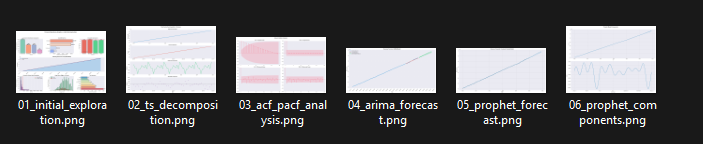


visualisation images will be saved in same folder